# Stock market clustering 
# GROUP 25

_Data Structures and Algorithms_

_Imperial College Business School_


---
This assignment is divided into three parts. In the first part, you will work on `pandas` data analysis. In the second part, you will implement a clustering algorithm to group companies based on their stock price movements. In the final part, you will explore ways to extend and improve this analysis. 

---

**The assignment is graded not only on correctness but also on the presentation of the results.** Try to make the results of your calculations easy to read with eg string formatting, do some plots if you find them useful, and comment your code.

**There are no OK tests to test your functions in this assignment.** It is intended to set you up working on a real problem where you have to explore data and the problem to figure out your approach. The first part will also require you to use a search engine to find the right pandas functions to use to analyse your data. Some potentially useful pandas functions are listed in the file `veryUseful.py`. 

**You're working as a group, so you may wish to divide the work into smaller pieces.** Some of you may want to start working on the Pandas part, and others on the algorithm part. There is a set of intermediary results available for testing your algorithm, so you can start immediately on both parts. See the details below in question 3.


## Your group

You'll complete this assignment in your assigned study groups. If you are unsure about your group, please contact the programme team.

## Submission

Create a zip file containing your submission notebook (and possible other files required to run your code). Submit by uploading the zip file on the Hub: Go to DSA -> Assessment -> Homework 3. Only one submission is needed for your group. **Please note that the Hub has a file size limit.**

## Part 1: Pandas

**30% of grade**

In the previous homework, we used lists to study stock prices. The `pandas` library provides some more effective tools for data analysis.

The assignment comes with two files containing company data:
- `SP_500_firms.csv` with firm and ticker names
- `SP_500_close_2015.csv` with stock price data for 2015

Let's first load up this data.

In [1]:
# Load data into Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

def read_names_into_dict():
    """
    Read company names into a dictionary
    """
    d = dict()
    with open("SP_500_firms.csv") as csvfile:
        input_file = csv.DictReader(csvfile)
        for row in input_file:
            #print(row)
            d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

names_dict = read_names_into_dict()
comp_names = names_dict.keys()

# Read price data with pandas
filename = 'SP_500_close_2015.csv'
price_data = pd.read_csv(filename, index_col=0)

In [2]:
price_data.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,156.678596,43.160459,61.986410,86.129228,19.765196,139.234407,72.339996,158.132353,12.860543,87.354435,...,33.927597,13.191375,41.513829,32.998169,37.072501,50.169998,69.542301,110.963875,27.853656,42.723658
2015-01-05,153.145069,43.170070,60.819874,84.674997,19.490271,135.889914,71.980003,156.047994,12.494440,86.173965,...,33.542483,12.903563,40.752108,33.199318,34.765202,49.130001,68.129346,115.103219,26.810004,42.467175
2015-01-06,151.511999,42.679830,60.518833,84.064223,19.126976,134.187800,70.529999,155.938290,12.212822,86.301853,...,33.720953,12.730876,40.161775,33.362155,34.560759,49.209999,67.293113,114.127520,25.786046,42.052863
2015-01-07,152.610267,43.025880,62.964797,85.828689,18.714587,136.566769,71.110001,159.289228,12.231597,88.033197,...,34.012134,12.893969,40.180818,33.381309,34.833350,48.590000,69.523080,116.965922,26.032190,42.920947
2015-01-08,156.267949,43.910238,63.623323,87.137495,18.901144,141.344618,72.919998,160.685446,12.419342,90.885990,...,34.406643,13.248937,41.075840,33.927287,35.096207,50.230000,70.734178,118.207726,26.396482,43.581878


### Question 1: Returns

In the previous homework, we calculated stock price _returns_ over a period of time. The return is defined as the percentage change, so the return between periods $t-1$ and $t$ for stock price $p$ would be

$$
x_t = \frac{p_t - p_{t-1}}{p_{t-1}}.
$$

Calculate the returns in `pandas` for all the stocks in `price_data`.

In [3]:
# Calculate company returns in this cell
daily_return = price_data.pct_change()
daily_return = daily_return[1:]
daily_return 

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.022553,0.000223,-0.018819,-0.016884,-0.013910,-0.024021,-0.004976,-0.013181,-0.028467,-0.013514,...,-0.011351,-0.021818,-0.018349,0.006096,-0.062237,-0.020729,-0.020318,0.037304,-0.037469,-0.006003
2015-01-06,-0.010664,-0.011356,-0.004950,-0.007213,-0.018640,-0.012526,-0.020145,-0.000703,-0.022539,0.001484,...,0.005321,-0.013383,-0.014486,0.004905,-0.005881,0.001628,-0.012274,-0.008477,-0.038193,-0.009756
2015-01-07,0.007249,0.008108,0.040417,0.020989,-0.021561,0.017729,0.008223,0.021489,0.001537,0.020061,...,0.008635,0.012811,0.000474,0.000574,0.007887,-0.012599,0.033138,0.024870,0.009546,0.020643
2015-01-08,0.023967,0.020554,0.010459,0.015249,0.009969,0.034985,0.025453,0.008765,0.015349,0.032406,...,0.011599,0.027530,0.022275,0.016356,0.007546,0.033752,0.017420,0.010617,0.013994,0.015399
2015-01-09,-0.012284,-0.010508,-0.027355,-0.001113,-0.018182,0.066901,-0.014811,-0.005089,-0.024943,-0.014612,...,-0.012285,-0.005793,-0.000927,0.012987,-0.018863,-0.010153,-0.001767,-0.014424,-0.027975,0.001584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,0.000198,0.000000,-0.002049,-0.001820,0.002060,-0.000250,-0.004224,0.000470,0.004193,-0.004088,...,-0.003068,0.005545,-0.000627,0.009630,-0.001616,-0.009869,-0.001619,0.001362,0.003975,0.003126
2015-12-28,0.000198,-0.001552,0.004961,-0.001439,0.002826,-0.002166,-0.001061,0.009522,-0.012526,-0.006203,...,0.011192,-0.021140,-0.001045,0.000502,-0.003507,-0.014952,-0.002162,-0.006413,-0.005040,-0.004779
2015-12-29,0.011044,0.017544,0.011915,0.011914,0.014092,-0.011605,0.011996,0.010960,0.015856,0.011565,...,0.002214,0.011342,0.007950,0.013798,0.004331,0.013095,0.005417,0.007253,0.006151,0.008977


### Question 1.1: Highest and lowest daily returns

Use pandas to find the 10 highest daily returns amongst all companies. Search online for what were the reasons behind the highest returns. Present your results in a clean and immediately readable form.

Repeat with the lowest daily returns.

In [4]:
# Your code here
max_ten_daily_return = daily_return.stack().nlargest(10) * 100
max_ten_daily_return = pd.DataFrame(max_ten_daily_return)
max_ten_daily_return.columns = ['Daily Return']
print('The 10 highest daily returns amongst all companies: ')
max_ten_daily_return

The 10 highest daily returns amongst all companies: 


,,Daily Return
Date,,
2015-08-27,FCX,28.661620
2015-06-22,WMB,25.899876
2015-10-14,TRIP,25.536060
2015-01-29,HAR,23.760024
2015-11-06,QRVO,23.225369
2015-10-02,WYNN,22.838913
2015-02-12,TRIP,22.491461
2015-05-29,HUM,20.312757
2015-10-21,KLAC,18.789451


In [5]:
min_daily_return = daily_return.stack().nsmallest(10)*100
min_daily_return = pd.DataFrame(min_daily_return)
min_daily_return.columns=['Daily Return']
print('The 10 lowest daily returns amongst all companies: ')
min_daily_return

The 10 lowest daily returns amongst all companies: 


,,Daily Return
Date,,
2015-10-16,PWR,-28.500570
2015-05-27,KORS,-24.195412
2015-07-24,BIIB,-22.080247
2015-10-23,SRCL,-19.276702
2015-10-07,YUM,-18.832414
2015-02-04,RL,-18.216937
2015-06-26,MU,-18.151540
2015-12-04,NRG,-17.958069
2015-11-09,MNK,-16.998142


- FCX: That day they announced a revised capital and operating plan. This will reduce costs and capital expenditures and strengthen their financial position during a period of weak and uncertain markets
- WMB: The company rejected a 48 billion dollars buyout offer from rival Energy Transfer Equity LP
- TRIP: At 14 Oct 2015, TripAdvisor (TRIP) announced some very welcome news via a partnership with Priceline. TripAdvisor's stock rose 22.5 \% on 12 Feb 2015 when it reported fourth-quarter earnings that revenue increased 35%.
- HAR: The company announced strategic collaboration with Chinese search engine Baidu ( BIDU ), with plans to launch CarLife.
- QRVO: The company announced that revenues nearly doubled to 708.3 million dollars during its fiscal 2016 second quarter compared with 362.7 million dollars a year ago. Also, they announced that its board of directors has authorized a new 1 billion dollars share repurchase program
- WYNN: Because China signals new support for Macau's economy in all aspects
- HUM: The company was reported that they are considering being acquired by Aetna Inc or Cigna Corp
- KLAC: Lam's offer of 32 dollars per KLA-Tencor share comes in a combination of cash and stock, two compnay is going to merge.
- PRGO: Generic and specialty pharmaceuticals company Mylan has proposed buying Perrigo in a 29 billion dollars cash-and-stock deal that day.

### Question 1.2: Highest and lowest yearly returns

Find the 10 highest yearly returns amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest yearly returns.

In [6]:
# Your code here
# Calculate yearly return
yearly_returns = (price_data.iloc[price_data.shape[0] - 1] - price_data.iloc[0]) /  price_data.iloc[0]
print(yearly_returns)

MMM    -0.057624
ABT     0.021440
ABBV   -0.071393
ACN     0.201626
ATVI    0.942684
          ...   
YHOO   -0.337054
YUM     0.032109
ZBH    -0.081229
ZION   -0.027638
ZTS     0.114511
Length: 496, dtype: float64


In [7]:
# Sort the yearly return
sorted_yearly_return = yearly_returns.sort_values(ascending =False)
# 10 highest yearly returns
yearly_high_return = sorted_yearly_return.nlargest(n = 10)
yearly_high_return = pd.DataFrame(yearly_high_return)
yearly_high_return.columns = ['Yearly Return']
print('the 10 highest yearly returns amongst all companies: ')
yearly_high_return

the 10 highest yearly returns amongst all companies: 


,Yearly Return
NFLX,1.294549
AMZN,1.190750
ATVI,0.942684
AYI,0.676443
NVDA,0.664514
GPN,0.600933
HRL,0.559016
EXR,0.544469
VRSN,0.527540
RAI,0.497837


In [8]:
# 10 lowest yearly returns
yearly_low_return = sorted_yearly_return.nsmallest(n = 10)
yearly_low_return = pd.DataFrame(yearly_low_return)
yearly_low_return.columns=['Yearly Return']
print('the 10 lowest yearly returns amongst all companies: ')
yearly_low_return

the 10 lowest yearly returns amongst all companies: 


,Yearly Return
CHK,-0.769785
SWN,-0.738314
FCX,-0.703792
KMI,-0.632032
MU,-0.592518
NRG,-0.559234
RRC,-0.553864
MRO,-0.546383
MUR,-0.538541
WYNN,-0.516602


### Question 1.3: Highest and lowest volatilities

Find the 10 highest yearly volatilities (standard deviations) amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest volatilities.

### For daily return:

In [9]:
# Your code here
dr_std = daily_return.std()

In [10]:
dr_highest_vol = pd.DataFrame(dr_std.nlargest(n = 10))
dr_highest_vol.columns = ['Volatility']
print('the 10 highest yearly volatilities amongst all companies: ')
dr_highest_vol

the 10 highest yearly volatilities amongst all companies: 


,Volatility
FCX,0.044071
CHK,0.042784
RIG,0.037553
SWN,0.035199
WYNN,0.034918
QRVO,0.033473
MNK,0.032573
WMB,0.032224
RRC,0.032172
NFLX,0.031975


In [11]:
dr_lowest_vol = pd.DataFrame(dr_std.nsmallest(n = 10))
dr_lowest_vol.columns = ['Volatility']
print('the 10 lowest yearly volatilities amongst all companies: ')
dr_lowest_vol

the 10 lowest yearly volatilities amongst all companies: 


,Volatility
KO,0.009063
CHD,0.009599
AJG,0.009711
PEP,0.009713
CLX,0.009725
DVA,0.009882
T,0.009943
VZ,0.009949
RSG,0.009973
PG,0.010106


### Question 2: Correlations

Analysts often care about the _correlation_ of stock prices between firms. Correlation measures the statistical similarity between the two prices' movements. If the prices move very similarly, the correlation of their _returns_  is close to 1. If they tend to make exactly the opposite movements (ie one price moves up and the other one down), the correlation is close to -1. If there is no clear statistical relationship between the movements of two stock prices, the correlation in their returns is close to zero.

For a sample of stock price returns $x,y$ with observations for $n$ days, the correlation $r_{xy}$ between $x$ and $y$ can be calculated as:

$$
r_{xy} = \frac{\sum x_i y_i - n \bar{x}\bar{y}}{ns_x s_y} = {\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}.
$$

Here $\bar{x}$ refers to the average value of $x$ over the $n$ observations, and $s_x$ to its standard deviation.

Based on time series of the stock returns we just computed, we can calculate a  correlation value for each pair of stocks, for example between MSFT (Microsoft) and AAPL (Apple). This gives us a measure of the similarity between the two stocks in this time period.


Calculate all correlations between companies. You can search online for a `pandas` or `numpy` function that does this directly.

In [12]:
# Your code here
correl = daily_return.corr()
correl

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.598666,0.322637,0.632059,0.418550,0.450897,0.468755,0.257132,0.335378,0.317374,...,0.409630,0.499817,0.507630,0.543733,0.623741,0.316706,0.356204,0.433634,0.486263,0.293897
ABT,0.598666,1.000000,0.483669,0.644081,0.434370,0.494315,0.585671,0.371080,0.450213,0.464380,...,0.453393,0.538242,0.507487,0.619810,0.567309,0.376226,0.388070,0.640907,0.512479,0.463925
ABBV,0.322637,0.483669,1.000000,0.318051,0.226868,0.269096,0.347337,0.292497,0.303990,0.419365,...,0.261256,0.291590,0.323337,0.267436,0.321926,0.307020,0.289728,0.508626,0.323670,0.406247
ACN,0.632059,0.644081,0.318051,1.000000,0.462545,0.481296,0.560759,0.303227,0.395830,0.401335,...,0.388994,0.531886,0.510191,0.563153,0.615349,0.431369,0.353528,0.461188,0.546654,0.414050
ATVI,0.418550,0.434370,0.226868,0.462545,1.000000,0.310464,0.482777,0.223484,0.198134,0.285121,...,0.295291,0.369757,0.398586,0.388827,0.397004,0.365900,0.330467,0.370687,0.346790,0.323141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YHOO,0.316706,0.376226,0.307020,0.431369,0.365900,0.330425,0.313944,0.236624,0.186997,0.396039,...,0.102182,0.256104,0.281075,0.393230,0.419622,1.000000,0.195440,0.395166,0.317464,0.320558
YUM,0.356204,0.388070,0.289728,0.353528,0.330467,0.231669,0.482704,0.336033,0.231697,0.332220,...,0.249471,0.234024,0.308590,0.329237,0.301383,0.195440,1.000000,0.300762,0.316432,0.244152
ZBH,0.433634,0.640907,0.508626,0.461188,0.370687,0.373915,0.409590,0.319560,0.335481,0.504068,...,0.324352,0.397568,0.366280,0.455777,0.417949,0.395166,0.300762,1.000000,0.406406,0.415177
ZION,0.486263,0.512479,0.323670,0.546654,0.346790,0.292112,0.445173,0.345233,0.332337,0.338972,...,0.110038,0.481049,0.361690,0.503104,0.578436,0.317464,0.316432,0.406406,1.000000,0.298130


### Question 2.1

Next, analyse the correlations between the companies:
- Define functions to print out the $n$ top and bottom correlated companies for any given company. 
- Use your functions to study the following companies in the tech sector: Amazon, Microsoft, Facebook, Apple, and Google. Comment on the results. Which (possibly other) companies are they most closely related to in terms of highest correlations? Would you have expected the results you see?

In [13]:
# Your code here
# Set the Default value of n = 10 (number of printing out)
def get_top_bottom_corr(corr, company_name, k = 10):
    company = names_dict[company_name][0]
    industry = names_dict[company_name][1]
    print('Company name: ' , company)
    print('Industry field: ' , industry)
    print()
    print('The n top correlated companies for given company: ', company_name)
    # n = k + 1 because the largest one is company itself
    # Then we also need to be delete the largest one
    print(corr[company_name].nlargest(n = k + 1)[1:])
    print()
    # n = k + 1 because the largest one is company itself
    print('The n bottom correlated companies for given company: ', company_name)
    print(corr[company_name].nsmallest(n = k))

Use the above function to study the following companies in the tech sector:    \
Amazon

In [14]:
print("Amazon")
get_top_bottom_corr(correl, "AMZN")

Amazon
Company name:  Amazon.com Inc
Industry field:  Consumer Discretionary

The n top correlated companies for given company:  AMZN
GOOGL    0.585553
GOOG     0.584337
SBUX     0.571951
V        0.560704
MA       0.538708
JNPR     0.531443
MSFT     0.524403
FB       0.500222
HSIC     0.479651
IPG      0.471228
Name: AMZN, dtype: float64

The n bottom correlated companies for given company:  AMZN
SRCL    0.056451
RIG     0.060162
SWN     0.082376
TRIP    0.087684
WFM     0.090700
DO      0.091286
HP      0.106780
KLAC    0.106865
KSS     0.107043
NRG     0.126722
Name: AMZN, dtype: float64


Microsoft

In [15]:
print("Microsoft")
get_top_bottom_corr(correl, "MSFT")

Microsoft
Company name:  Microsoft Corp.
Industry field:  Information Technology

The n top correlated companies for given company:  MSFT
MMC      0.604549
PG       0.604204
MA       0.590886
ADP      0.589445
SBUX     0.583705
BRK-B    0.583071
CA       0.580201
ACN      0.577228
AMP      0.577016
FISV     0.576048
Name: MSFT, dtype: float64

The n bottom correlated companies for given company:  MSFT
SRCL    0.028887
NRG     0.090761
RIG     0.113785
SWN     0.114787
URBN    0.128788
KSS     0.130144
RRC     0.135989
KORS    0.143060
KMI     0.148986
DO      0.151773
Name: MSFT, dtype: float64


Facebook

In [16]:
print("Facebook")
get_top_bottom_corr(correl, "FB")

Facebook
Company name:  Facebook
Industry field:  Information Technology

The n top correlated companies for given company:  FB
FISV     0.619667
MA       0.617659
SBUX     0.598190
GOOGL    0.586548
TSS      0.580214
GOOG     0.569256
V        0.559706
PAYX     0.559205
ADP      0.557133
HON      0.556113
Name: FB, dtype: float64

The n bottom correlated companies for given company:  FB
NEM   -0.002832
RIG    0.013327
SWN    0.047667
DO     0.054310
CHK    0.058682
RRC    0.059883
HP     0.062859
NRG    0.064936
KMI    0.114758
NOV    0.126840
Name: FB, dtype: float64


Apple

In [17]:
print("Apple")
get_top_bottom_corr(correl, "AAPL")

Apple
Company name:  Apple Inc.
Industry field:  Information Technology

The n top correlated companies for given company:  AAPL
ITW     0.601265
NOC     0.589368
HON     0.576730
FISV    0.573935
SWKS    0.573350
COL     0.570694
TEL     0.569454
BA      0.563837
ROK     0.560731
WFC     0.558983
Name: AAPL, dtype: float64

The n bottom correlated companies for given company:  AAPL
RRC    0.112711
CMG    0.130501
NEM    0.143713
RIG    0.144045
SWN    0.146811
MYL    0.159546
DO     0.160479
HP     0.165746
NRG    0.166044
HCN    0.174600
Name: AAPL, dtype: float64


Google

In [18]:
print("Google")
get_top_bottom_corr(correl, "GOOG")

Google
Company name:  Alphabet Inc Class C
Industry field:  Information Technology

The n top correlated companies for given company:  GOOG
GOOGL    0.989365
AMZN     0.584337
FB       0.569256
PGR      0.547913
MSFT     0.520563
MA       0.512357
SBUX     0.501990
HON      0.496112
HSIC     0.489696
FISV     0.487890
Name: GOOG, dtype: float64

The n bottom correlated companies for given company:  GOOG
SRCL     0.017149
RIG      0.023044
DO       0.053734
RRC      0.056774
URBN     0.067461
SWN      0.068524
NEM      0.096350
CHK      0.096618
NRG      0.100762
DISCA    0.106437
Name: GOOG, dtype: float64


In [19]:
print("Google")
get_top_bottom_corr(correl, "GOOGL")

Google
Company name:  Alphabet Inc Class A
Industry field:  Information Technology

The n top correlated companies for given company:  GOOGL
GOOG    0.989365
FB      0.586548
AMZN    0.585553
PGR     0.556862
MA      0.515583
SBUX    0.498846
HON     0.495960
HSIC    0.494186
MSFT    0.490093
FISV    0.489241
Name: GOOGL, dtype: float64

The n bottom correlated companies for given company:  GOOGL
RIG     0.009523
RRC     0.043924
DO      0.045733
SWN     0.062425
SRCL    0.062576
NEM     0.077247
URBN    0.078335
CHK     0.079766
KSS     0.104540
NRG     0.104954
Name: GOOGL, dtype: float64


- After looking at the correlation of technology companies, all of them are highly correlated to other technology firms. For example, the most correlated firm to Amazon is Google. In addition, these technology companies are also highly related to some financial services companies such as VISA, Fiserv and Mastercard. Facebook Correlates Fiserv and Mastercard with 0.619667 and 0.617659, respectively.
- Besides, Apple is a little bit different to other top technology companies as Apple produces electronics rather than providing services. The high correlation firms to apple include semiconductor companies and manufacturers. For instance, the correlation between Apple and Illinois Tool Works Inc is 0.601265; the correlation between Apple and Northrop Grumman Corporation is 0.589368. 
- An interesting point I did not expect is that Starbucks is highly correlated to most technology companies, such as the correlation between Amazon and Starbucks is 0.571951; the correlation between Microsoft and Starbucks is 0.583705. This might be because Starbucks utilizes a lot of technology to support its services and business.

## Part 2:  Clustering

**30% of grade**

In this part of the assignment, you will develop a clustering algorithm to study the similarity of different stocks. 

The general purpose of clustering analysis is dividing a set of objects into groups that are somehow "similar" to each other. It is a widespread tool used for exploratory data analysis in diverse fields in both science and business. For example, in marketing analytics, cluster analysis is employed to group consumers into segments based on their characteristics or _features_, such as age, post code, purchase history, etc. These features are somehow aggregated to compare the similarity between consumers. Based on this similarity, a clustering algorithm then divides the consumers into segments.

We will apply this idea on stock market data to identify groups of stocks that perform similarly over time. There are many reasons for grouping stocks together, such as analysing trading strategies, risk management, or simply presenting stock market information. Publicly traded companies are often grouped together by simple features such as the industry they operate in (eg tech companies or pharma companies), but here we'll take a data-driven approach, grouping together stocks that perform similarly over time. 

Cluster analysis is an umbrella term for many different algorithmic approaches. Here you'll develop one that's based on the concept of `greedy` algorithm design, specified below. You'll also have the opportunity to explore other approaches using Python libraries.

What is a good measure for stocks "performing similarly" to use for clustering. Let's use the one we just calculated: correlations in their returns. How can we use this similarity information for clustering? We now have access to all correlations between stock returns in S&P 500. We can think of this as a _graph_ as follows. The _nodes_ of the graph are the stocks (eg MSFT and AAPL). The _edges_ between them are the correlations, which we have just calculated between each stock, where the value of the correlation is the edge weight. Notice that since we have the correlations between all companies, this is a _dense_ graph, where all possible edges exist.

We thus have a graph representing pairwise "similarity" scores in correlations, and we want to divide the graph into clusters. There are many possible ways to do this, but here we'll use a _greedy_ algorithm design. The algorithm is as follows:

1. Sort the edges in the graph by their weight (ie the correlation), pick a number $k$ for the number of iterations of the algorithm
2. Create single-node sets from each node in the graph
3. Repeat $k$ times:
	1. Pick the graph edge with the highest correlation
	2. Combine the two sets containing the source and the destination of the edge
	3. Repeat with the next-highest weight edge
4. Return the remaining sets after the $k$ iterations 

What does the algorithm do? It first initializes a graph with no connections, where each node is in a separate set. Then in the main loop, it runs through the $k$ highest-weighted edges, and adds connections at those edges. This leads to sets being combined (or "merged"). The result is "groups" of stocks determined by the highest correlations between the stock returns. These are your stock clusters.

For example, suppose that the toy graph below represents four stocks: A,B,C,D and their return correlations. Suppose we pick $k=2$ and run the algorithm. 

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


The algorithm would begin by initializing four separate sets of one node each: {A}, {B}, {C}, {D}. It would then first connect C and D because of their correlation 0.95, resulting in just three sets: {A}, {B}, and {C,D}. Then it would connect A and B, resulting in two sets of two nodes each: {A,B}, and {C,D}. These would be our clusters for $k=2$.

### Question 3: Implementing the algorithm

Your task is to implement the clustering algorithm using the functions below. First, for convenience in implementing the algorithm, let's create a list of the correlations from the pandas data. 

In [20]:
def create_correlation_list(correl):
    """
    Creates a list of correlations from a pandas dataframe of correlations
    
    Parameters:
        correl: pandas dataframe of correlations
    
    Returns:
        list of correlations containing tuples of form (correlation, ticker1, ticker2)
    """
    n_comp = len(correl.columns)
    comp_names = list(correl.columns)
    # Faster if we use a numpy matrix
    correl_mat = correl.to_numpy()
    L = [] # create list
    for i in range(n_comp):
        for j in range(i+1,n_comp):
            L.append((correl_mat[i,j],comp_names[i],comp_names[j]))
    return L

edges = create_correlation_list(correl)

Next, let's turn to the algorithm itself. Consider the example above, repeated here.

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


Suppose we pick $k=3$ and have sorted the edge list in step 1 of the algorithm. How should we represent the clusters in step 2? One great way is to use a dictionary where each _key_ is a node, and each _value_ is another node that this node "points to". A cluster is then a chain of these links, which we represent as a dictionary.

In step 2 of the algorithm, we start with four nodes that point to themselves, ie the dictionary `{'A':'A','B':'B','C':'C','D':'D'}`. When a node points to itself, it ends the chain. Here the clusters are thus just the nodes themselves, as in the figure below.

<img src="cluster1.png" alt="cluster1" style="width: 200px;"/>


Let's walk through the algorithm's next steps. We first look at the highest-weight edge, which is between C and D. These clusters will be combined. In terms of the dictionary, this means that one of them will not point to itself, but to the other one (here it does not matter which one). So we make the dictionary at `C` point to `D`. The dictionary becomes `{'A':'A','B':'B','C':'D','D':'D'}`.

<img src="cluster2.png" alt="cluster2" style="width: 200px;"/>


The next highest correlation is between A and B, so these clusters would be combined. The dictionary becomes `{'A':'B','B':'B','C':'D','D':'D'}`.

<img src="cluster3.png" alt="cluster3" style="width: 200px;"/>


The third highest correlation is between C and B. Let's think about combining these clusters using the dictionary we have. Looking up `B`, we get `B`: the node B is in the _bottom_ of the chain representing its cluster. But when we look up `C`, it points to `D`. Should we make `C` point to `B`? No - that would leave nothing  pointing at `D`, and `C` and `D` should remain connected! We could perhaps have `C` somehow point at both nodes, but that could become complicated, so we'll do the following instead. We'll follow the chain to the bottom. In the dictionary, we look up `C` and see that it points to `D`. We then look up `D` which points to itself, so `D` is the _bottom_ node. We then pick one of the bottom nodes `B` and `D`, and make it point to the other. We then have the dictionary `{'A':'B','B':'B','C':'D','D':'B'}`, and the corresponding clustering in the figure below.

<img src="cluster4.png" alt="cluster4" style="width: 200px;"/>


In other words, we'll keep track of clusters in a dictionary such that **each cluster has exactly one bottom node**. To do this, we need a mechanism for following a cluster to the bottom. You'll implement this in the function `find_bottom` below. The function takes as input a node and a dictionary, and runs through the "chain" in the dictionary until it finds a bottom node pointing to itself.

The other thing we'll need to do is combine clusters by connecting two nodes. This means taking the two nodes, finding the bottom node for each node's cluster, and making one point to the other. You'll implement this in the function `merge_clusters` below.

Finally, you'll need to set up the algorithm by sorting the correlations, and then looping through this merging $k$ times. You'll implement this in the function `cluster_correlations` below. This completes the algorithm.

But there is one more thing. If you only keep track of a dictionary like `{'A':'B','B':'B','C':'D','D':'B'}`, how do you actually find the clusters from the dictionary? A convenient way is to store some extra information: the "starting nodes" of each cluster to which no other node links. For example, above these "starting nodes" would include all nodes `A,B,C,D` in the beginning, but only `A` and `C` in the end. If we keep track of these, we can then write a function that starts from each such remaining "starting node", works through to the bottom, and creates the cluster along the way. You'll implement this in the function `construct_sets` below.

### Intermediary results

You can load a pre-computed set of results up to this point using the following commands.

In [21]:
# Load intermediary results from a "pickle" file
# You can use these with your algorithm below
import pickle
file_name = 'cluster_correlations'
with open(file_name, "rb") as f:
    correl = pickle.load(f)
    edges = pickle.load(f)

firms = list(correl.columns)
print(firms[:10])
edges[:10]

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET']


[(0.598666164029738, 'MMM', 'ABT'),
 (0.32263699601940254, 'MMM', 'ABBV'),
 (0.6320593488560189, 'MMM', 'ACN'),
 (0.41855006701119907, 'MMM', 'ATVI'),
 (0.4508974957132859, 'MMM', 'AYI'),
 (0.4687548443045165, 'MMM', 'ADBE'),
 (0.25713165217544326, 'MMM', 'AAP'),
 (0.33537796741224424, 'MMM', 'AES'),
 (0.31737374099675925, 'MMM', 'AET'),
 (0.5059306055816828, 'MMM', 'AMG')]

### Clustering implementation

Complete the following functions to implement the clustering algorithm.

In [22]:
def find_bottom(node, next_nodes):
    """
    Find the "bottom" of a cluster starting from node in dictionary next_nodes

    Parameters:
        node: starting node
        next_nodes: dictionary of node connections

    Returns:
        the bottom node in the cluster
    """
    # Your code here
    while next_nodes[node] != node:
        node = next_nodes[node]
    return next_nodes[node]


def merge_sets(node1, node2, next_nodes, set_starters):
    """
    Merges the clusters containing node1, node2 using the connections dictionary next_nodes.
    Also removes any bottom node which is no longer a "starting node" from set_starters.

    Parameters:
        node1: first node the set of which will be merged
        node2: second node the set of which will be merged
        next_nodes: dictionary of node connections
        set_starters: set of nodes that "start" a cluster

    Returns:
        does this function need to return something?
    """
    start = find_bottom(node1,next_nodes)
    end = find_bottom(node2,next_nodes)
    if node1 == node2 or start == node2 or start == end or node1 == end:
        return
    next_nodes[start]=end
    if(end in set_starters):
        try:
            set_starters.remove(end)
        except:
            pass


def cluster_correlations(edge_list, firms, k=200):
    """
    A mystery clustering algorithm
     
    Parameters:
         edge_list - list of edges of the form (weight,source,destination)
         firms - list of firms (tickers)
         k - number of iterations of algorithm

    Returns:
         next_nodes - dictionary to store clusters as "pointers"
            - the dictionary keys are the nodes and the values are the node in the same cluster that the key node points to
         set_starters - set of nodes that no other node points to (this will be used to construct the sets below)

    Algorithm:
         1 sort edges by weight (highest correlation first)
         2 initialize next_nodes so that each node points to itself (single-node clusters)
         3 take highest correlation edge
            check if the source and destination are in the same cluster using find_bottom
            if not, merge the source and destination nodes' clusters using merge_sets
         4 if max iterations not reached, repeat 3 with next highest correlation
         (meanwhile also keep track of the "set starters" ie nodes that have nothing pointing to them for later use)
    """
    # Sort edges
    sorted_edges = sorted(edge_list, key = lambda x: x[0], reverse = True)
    #sorted_edges = sorted(edge_list, reverse = True)
    # Initialize dictionary of pointers
    next_nodes = {node: node for node in firms}
    #print(next_nodes)
    # Keep track of "starting nodes", ie nodes that no other node points to in next_nodes
    set_starters = {node for node in firms}
    # Loop k times
    for i in range(k):
        highest = sorted_edges.pop(0)
        if find_bottom(highest[1], next_nodes) != find_bottom(highest[2], next_nodes):
            merge_sets(highest[1], highest[2], next_nodes, set_starters)
        if sorted_edges == []:
            break
    return set_starters, next_nodes

Try some examples:      

In [23]:
edges1 = [(0.8, 'A', 'B'), (0.32, 'B', 'D'), (0.95, 'C', 'D'), (0.63, 'A', 'C'), (0.68, 'C', 'B'), (0.05, 'A', 'D'), (0.7, 'B', 'E'), (0.2, 'D', 'E'), (0.23, 'A', 'E'), (0.1,'C', 'E')]
firms1 = ['A', 'B', 'C', 'D', 'E']
cluster_correlations(edges1, firms1, k=200)

({'A', 'C'}, {'A': 'B', 'B': 'E', 'C': 'D', 'D': 'E', 'E': 'E'})

In [24]:
set_starters, next_nodes = cluster_correlations(edges, firms, k=200)

Once we've run the algorithm, we'll need to construct the clusters. You can use the function below to do so.

In [25]:
def construct_sets(set_starters, next_nodes):
    """
    Constructs sets (clusters) from the next_nodes dictionary
    
    Parameters:
        set_starters: set of starting nodes 
        next_nodes: dictionary of connections
    
    Returns: 
        dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    """
    # Initialise an empty dictionary 
    all_sets = dict()
    
    # Loop:
    # Start from each set starter node
    # Construct a "current set" with all nodes on the way to bottom node
    # If bottom node is already a key of all_sets, combine the "current set" with the one in all_sets,
    # Otherwise add "current set" to all_sets
    for s in set_starters:
        cur_set = set()
        cur_set.add(s)
        p = s
        while next_nodes[p] != p:
            p = next_nodes[p]
            cur_set.add(p)
            
        if p not in all_sets:
            all_sets[p] = cur_set
        else: 
            for item in cur_set:
                all_sets[p].add(item)
    return all_sets

all_clusters = construct_sets(set_starters,next_nodes)

### Question 3.2: analysing the results

After you have implemented the algorithm in Python, add cells below answering the following questions:
- Do some detective work: what is the algorithm that you've implemented called? In what other graph problem is it often used? How are the problems related? (Hint: the algorithm is mentioned on the Wikipedia page for greedy algorithms.)
- Run the algorithm and present the results formatted in a useful way. 
- Discuss the results for different values of $k$.  
- Do the resulting clusters "make sense"? (You may need to search online what the companies do.) Verify that the stocks in your clusters perform similarly by plotting the returns and the (normalised) stock prices for some of the clusters.
- You may use graphs etc. to present your results.

#### 1. Do some detective work:     

   The algorithm we've implemented is called the Kruskal algorithm. It is often used in typical minimum spanning treeproblem. For example, the problem of bus station. A city newly added several stations (A, B, C…), and the distance of each station is represented by the edge (weight), how to set the bus route to ensure that each station can be connected, and the total length of the route is the shortest? Weight can also represent time, cost, etc in other problems. These problems have the same characteristic that the local optimal solution has the possibility to become the global optimal solution at each step. The number of nodes in these problems is usually large, while the number of edges is small, and the complexity of Kruskal algorithm is O(eloge)(e is the number of edges in the graph).

#### 2. More Analysis:

The actual clustering in real world finance is divided by different sectors, which are comsumer discretionary, comsumer staples, energy and seven other sectors. We now want to verify whether the clusters generated by our algorithm are consist with the actual cluster. We implement the verification process by using scatter plot.

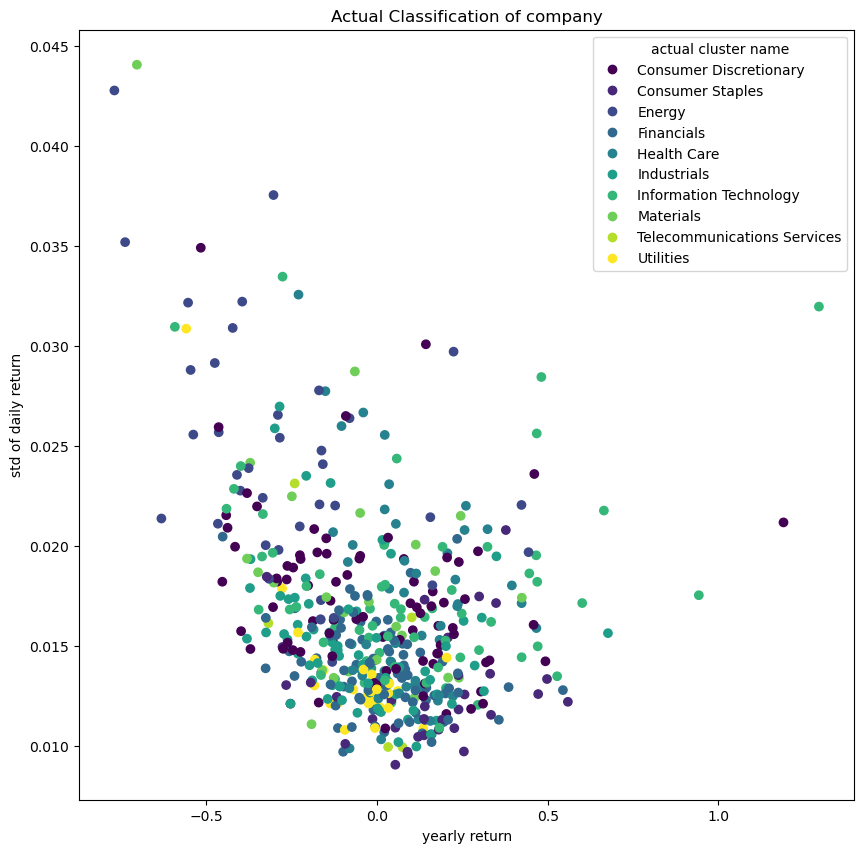

number of actual clusters by the type of company:  10


In [26]:
company_name_dict = {}
for i in range(len(firms)):
    company_name_dict[i] = firms[i]
actual_cluster = []
for i in firms:
    actual_cluster.append(names_dict[i][1])
actual_df = pd.DataFrame(data = list(zip(actual_cluster, yearly_returns, dr_std)), columns = ['actual cluster', 'yearly return', 'std of daily return'])
actual_df = actual_df.rename(index = company_name_dict)
actual_name, actual_df['given colour'] = np.unique(actual_df["actual cluster"], return_inverse=True)
#print(actual_df)
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = actual_df)
plt.legend(sc.legend_elements()[0], actual_name, title = "actual cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Actual Classification of company")
plt.show()
print('number of actual clusters by the type of company: ', len(list(set(actual_cluster))))

The scatter plot above shows the real-world clusters of firms. Now, we plot the cluster result generated by our greedy algorithm with k=200.

In [27]:
# For each company in list which is represented by firms
# The length of the new data frame is len(firms)
# Return a list of each company's bottom, which means return a list of which cluster each company in 
def return_key(val, cluster):
    for key, value in cluster.items():
        if val in value:
            return key

def get_cluster(company, cluster):
    cluster_list = []
    for i in company:
        key = return_key(i, cluster)
        cluster_list.append(key)
    return cluster_list

In [28]:
def filtered(dicti):
    filtered = {}
    for key, value in dicti.items():
        if len(value) != 1:
            filtered[key] = value
    return filtered

def get_company(dicti):
    company = []
    for i in dicti.keys():
        for j in dicti[i]:
            company.append(j)
    return company
    
def filtered_df(df, dicti, company):
    filt = []
    for i in company:
        filt.append(df[i])
    return filt

def get_company_dict(company):
    company_name_dict = {}
    for i in range(len(company)):
        company_name_dict[i] = company[i]
    return company_name_dict

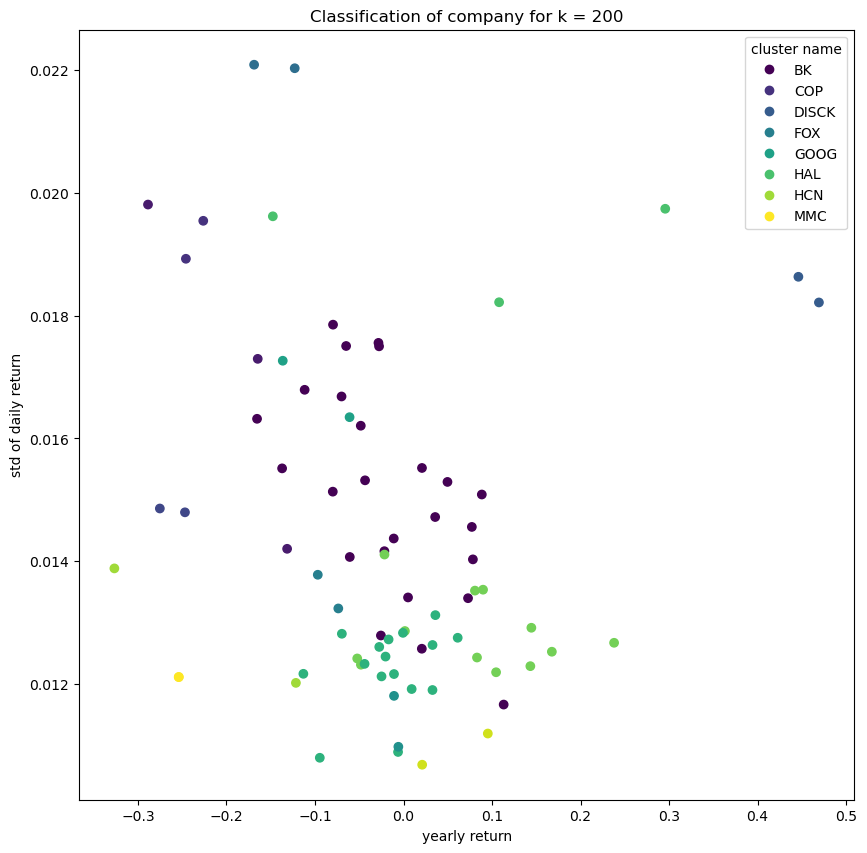

number of clusters:  15


In [29]:
all_clusters = construct_sets(set_starters, next_nodes)
filtered_clusters = filtered(all_clusters)
company_name = get_company(filtered_clusters)
filtered_cluster_list = get_cluster(company_name, filtered_clusters)
filtered_yearly_returns = filtered_df(yearly_returns, all_clusters, company_name)
filtered_dr_std = filtered_df(dr_std, all_clusters, company_name)
filtered_graph_df = pd.DataFrame(data = list(zip(filtered_cluster_list, filtered_yearly_returns, filtered_dr_std)), columns = ['cluster', 'yearly return', 'std of daily return'])
company_name_dict = get_company_dict(company_name)
#print(company_name_dict)
filtered_graph_df = filtered_graph_df.rename(index = company_name_dict)
label, filtered_graph_df['given colour'] = np.unique(filtered_graph_df["cluster"], return_inverse=True)
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = filtered_graph_df)
plt.legend(sc.legend_elements()[0], label, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company for k = 200")
plt.show()
print('number of clusters: ', len(list(filtered_clusters.keys())))

The plot above is the scatter plot of the clusters result with k=200. Comparing with the actual clusters, the clusters generate by our algorithm are generally consistent with the actual clusters. However, there are still some deviations, which are the numbers of firms in a specific cluster and the total number of clusters. As for the numbers of firms in a specific clusters, our algorithm failed to generate a complete set of firms, which is result from deleting all the self-pointed firm. As for the total numbers of clusters, our algorithm generate more clusters than the actual sectors, which is because the process of merge should be done continously. Therefore, both of the deviations result from an improper choose of k.

#### 3. Deep analysis on different k

So now we try to make comparison between different k, in order to find the most proper one.
For k = 100, there also exist the same problem with k=200, which is shown in the plot below:

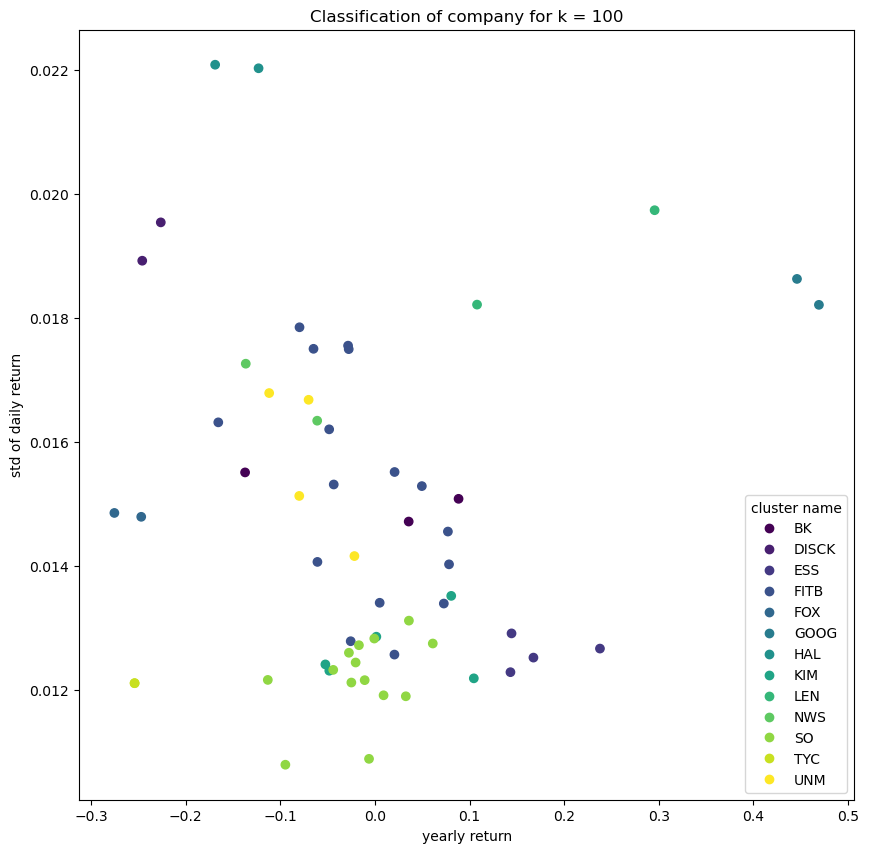

number of clusters:  13


In [30]:
set_starters_100, next_nodes_100 = cluster_correlations(edges, firms, k = 100)
all_clusters_100 = construct_sets(set_starters_100, next_nodes_100)
filtered_clusters_100 = filtered(all_clusters_100)
company_name_100 = get_company(filtered_clusters_100)
filtered_cluster_list_100 = get_cluster(company_name_100, filtered_clusters_100)
filtered_yearly_returns_100 = filtered_df(yearly_returns, all_clusters_100, company_name_100)
filtered_dr_std_100 = filtered_df(dr_std, all_clusters_100, company_name_100)
filtered_graph_df_100 = pd.DataFrame(data = list(zip(filtered_cluster_list_100, filtered_yearly_returns_100, filtered_dr_std_100)), columns = ['cluster', 'yearly return', 'std of daily return'])
company_name_dict_100 = get_company_dict(company_name_100)
#print(company_name_dict)
filtered_graph_df_100 = filtered_graph_df_100.rename(index = company_name_dict_100)
label_100, filtered_graph_df_100['given colour'] = np.unique(filtered_graph_df_100["cluster"], return_inverse=True)
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = filtered_graph_df_100)
plt.legend(sc.legend_elements()[0], label_100, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company for k = 100")
plt.show()
print('number of clusters: ', len(list(filtered_clusters_100.keys())))

For k = 500:

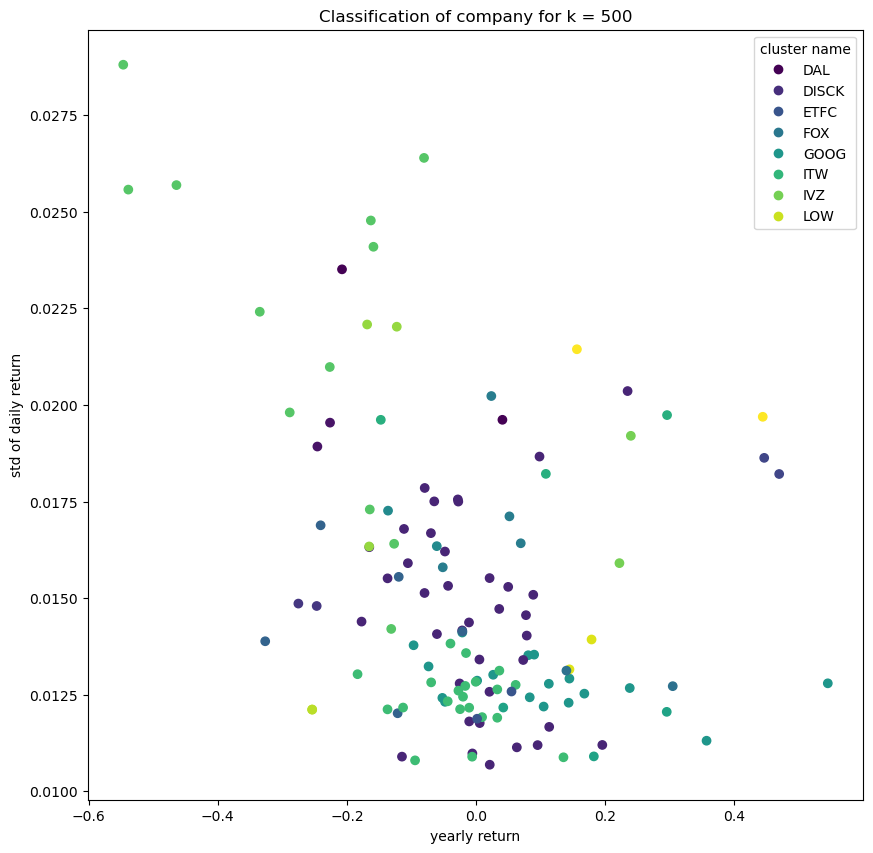

number of clusters:  20


In [31]:
set_starters_500, next_nodes_500 = cluster_correlations(edges, firms, k = 500)
all_clusters_500 = construct_sets(set_starters_500, next_nodes_500)
filtered_clusters_500 = filtered(all_clusters_500)
company_name_500 = get_company(filtered_clusters_500)
filtered_cluster_list_500 = get_cluster(company_name_500, filtered_clusters_500)
filtered_yearly_returns_500 = filtered_df(yearly_returns, all_clusters_500, company_name_500)
filtered_dr_std_500 = filtered_df(dr_std, all_clusters_500, company_name_500)
filtered_graph_df_500 = pd.DataFrame(data = list(zip(filtered_cluster_list_500, filtered_yearly_returns_500, filtered_dr_std_500)), columns = ['cluster', 'yearly return', 'std of daily return'])
company_name_dict_500 = get_company_dict(company_name_500)
#print(company_name_dict)
filtered_graph_df_500 = filtered_graph_df_500.rename(index = company_name_dict_500)
label_500, filtered_graph_df_500['given colour'] = np.unique(filtered_graph_df_500["cluster"], return_inverse=True)
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = filtered_graph_df_500)
plt.legend(sc.legend_elements()[0], label_500, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company for k = 500")
plt.show()
print('number of clusters: ', len(list(filtered_clusters_500.keys())))

For k = 1000:

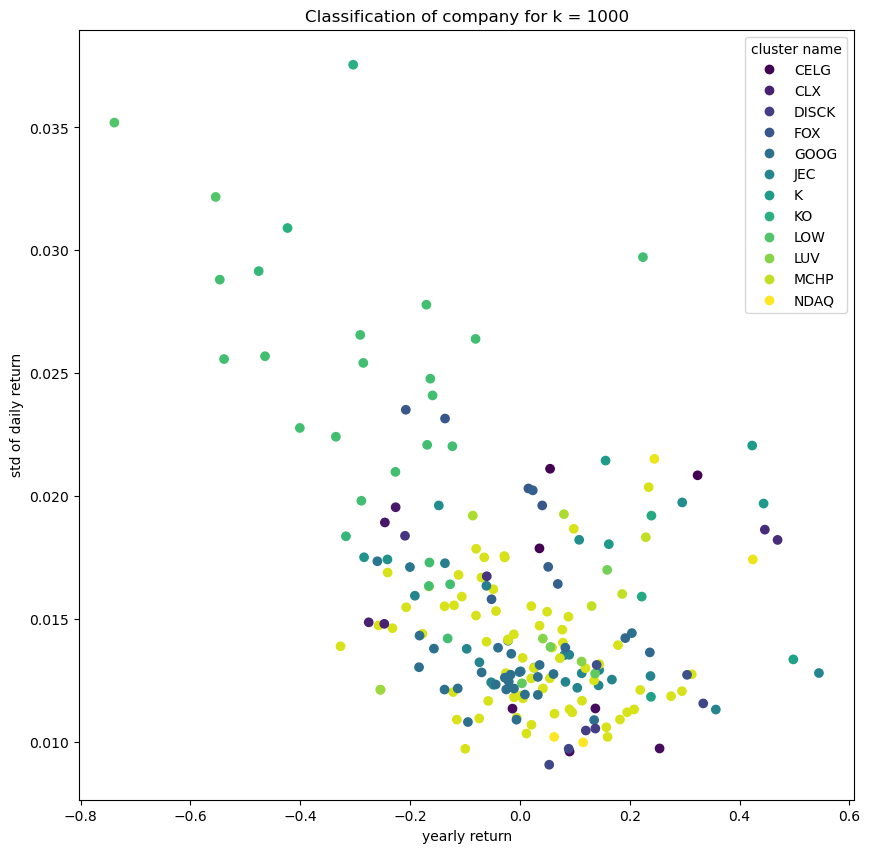

number of clusters:  34


In [32]:
set_starters_1000, next_nodes_1000 = cluster_correlations(edges, firms, k = 1000)
all_clusters_1000 = construct_sets(set_starters_1000, next_nodes_1000)
filtered_clusters_1000 = filtered(all_clusters_1000)
company_name_1000 = get_company(filtered_clusters_1000)
filtered_cluster_list_1000 = get_cluster(company_name_1000, filtered_clusters_1000)
filtered_yearly_returns_1000 = filtered_df(yearly_returns, all_clusters_1000, company_name_1000)
filtered_dr_std_1000 = filtered_df(dr_std, all_clusters_1000, company_name_1000)
filtered_graph_df_1000 = pd.DataFrame(data = list(zip(filtered_cluster_list_1000, filtered_yearly_returns_1000, filtered_dr_std_1000)), columns = ['cluster', 'yearly return', 'std of daily return'])
company_name_dict_1000 = get_company_dict(company_name_1000)
#print(company_name_dict)
filtered_graph_df_1000 = filtered_graph_df_1000.rename(index = company_name_dict_1000)
label_1000, filtered_graph_df_1000['given colour'] = np.unique(filtered_graph_df_1000["cluster"], return_inverse=True)
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = filtered_graph_df_1000)
plt.legend(sc.legend_elements()[0], label_1000, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company for k = 1000")
plt.show()
print('number of clusters: ', len(list(filtered_clusters_1000.keys())))

For k = 2000:

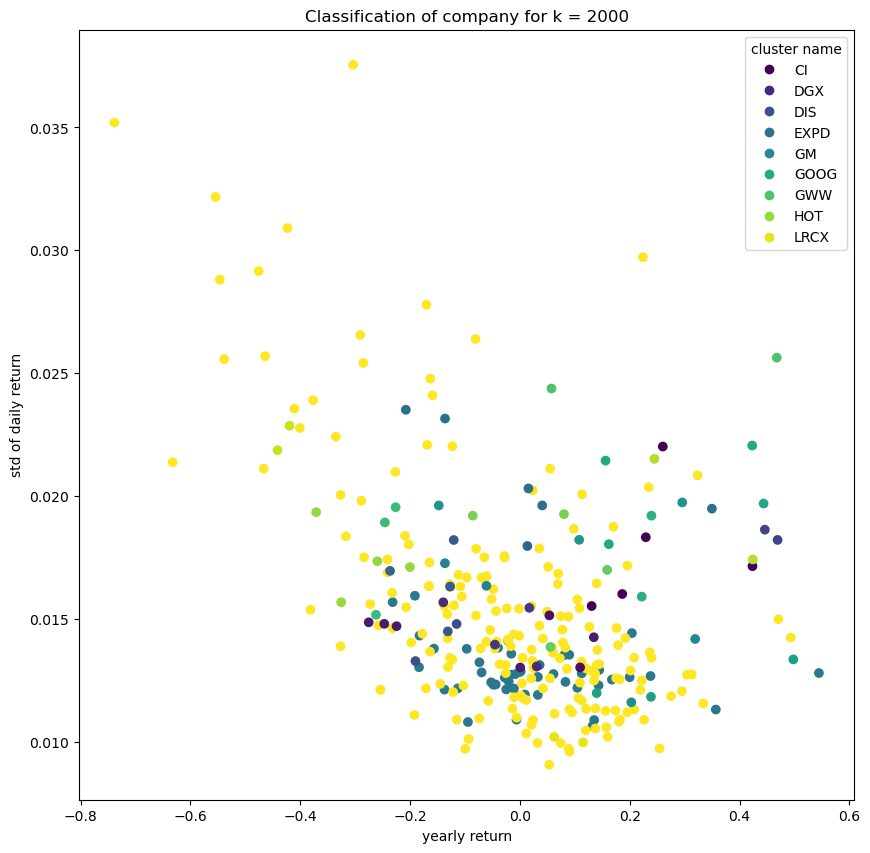

number of clusters:  26


In [33]:
set_starters_2000, next_nodes_2000 = cluster_correlations(edges, firms, k = 2000)
all_clusters_2000 = construct_sets(set_starters_2000, next_nodes_2000)
filtered_clusters_2000 = filtered(all_clusters_2000)
company_name_2000 = get_company(filtered_clusters_2000)
filtered_cluster_list_2000 = get_cluster(company_name_2000, filtered_clusters_2000)
filtered_yearly_returns_2000 = filtered_df(yearly_returns, all_clusters_2000, company_name_2000)
filtered_dr_std_2000 = filtered_df(dr_std, all_clusters_2000, company_name_2000)
filtered_graph_df_2000 = pd.DataFrame(data = list(zip(filtered_cluster_list_2000, filtered_yearly_returns_2000, filtered_dr_std_2000)), columns = ['cluster', 'yearly return', 'std of daily return'])
company_name_dict_2000 = get_company_dict(company_name_2000)
#print(company_name_dict)
filtered_graph_df_2000 = filtered_graph_df_2000.rename(index = company_name_dict_2000)
label_2000, filtered_graph_df_2000['given colour'] = np.unique(filtered_graph_df_2000["cluster"], return_inverse=True)
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = filtered_graph_df_2000)
plt.legend(sc.legend_elements()[0], label_2000, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company for k = 2000")
plt.show()
print('number of clusters: ', len(list(filtered_clusters_2000.keys())))

Now, we can see that, by increasing the parameter k, more firms are selected into our result sets, which fits more with the real world situation. At this moment one of the deviation has been resolved. However, the clusters generated are still too much. Now, we try to figure out that whether both the deviations can be resolved by keep increasing k.

For k = 5000:

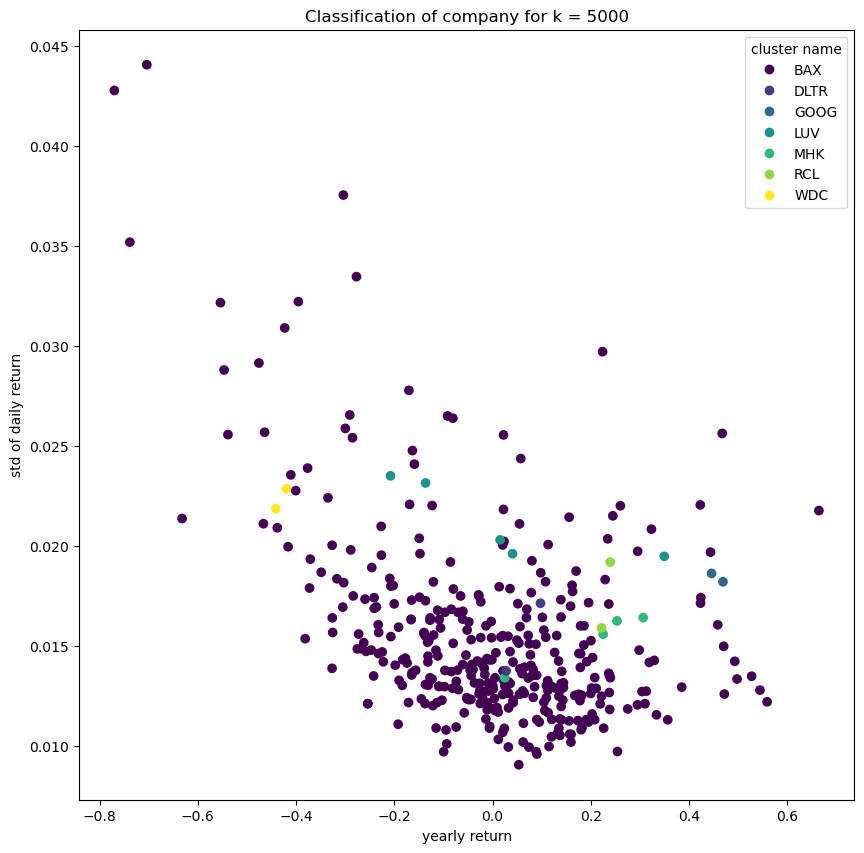

number of clusters:  7


In [34]:
set_starters_5000, next_nodes_5000 = cluster_correlations(edges, firms, k = 5000)
all_clusters_5000 = construct_sets(set_starters_5000, next_nodes_5000)
filtered_clusters_5000 = filtered(all_clusters_5000)
company_name_5000 = get_company(filtered_clusters_5000)
filtered_cluster_list_5000 = get_cluster(company_name_5000, filtered_clusters_5000)
filtered_yearly_returns_5000 = filtered_df(yearly_returns, all_clusters_5000, company_name_5000)
filtered_dr_std_5000 = filtered_df(dr_std, all_clusters_5000, company_name_5000)
filtered_graph_df_5000 = pd.DataFrame(data = list(zip(filtered_cluster_list_5000, filtered_yearly_returns_5000, filtered_dr_std_5000)), columns = ['cluster', 'yearly return', 'std of daily return'])
company_name_dict_5000 = get_company_dict(company_name_5000)
#print(company_name_dict)
filtered_graph_df_5000 = filtered_graph_df_5000.rename(index = company_name_dict_5000)
label_5000, filtered_graph_df_5000['given colour'] = np.unique(filtered_graph_df_5000["cluster"], return_inverse=True)
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = filtered_graph_df_5000)
plt.legend(sc.legend_elements()[0], label_5000, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company for k = 5000")
plt.show()
print('number of clusters: ', len(list(filtered_clusters_5000.keys())))

For k = 10000:

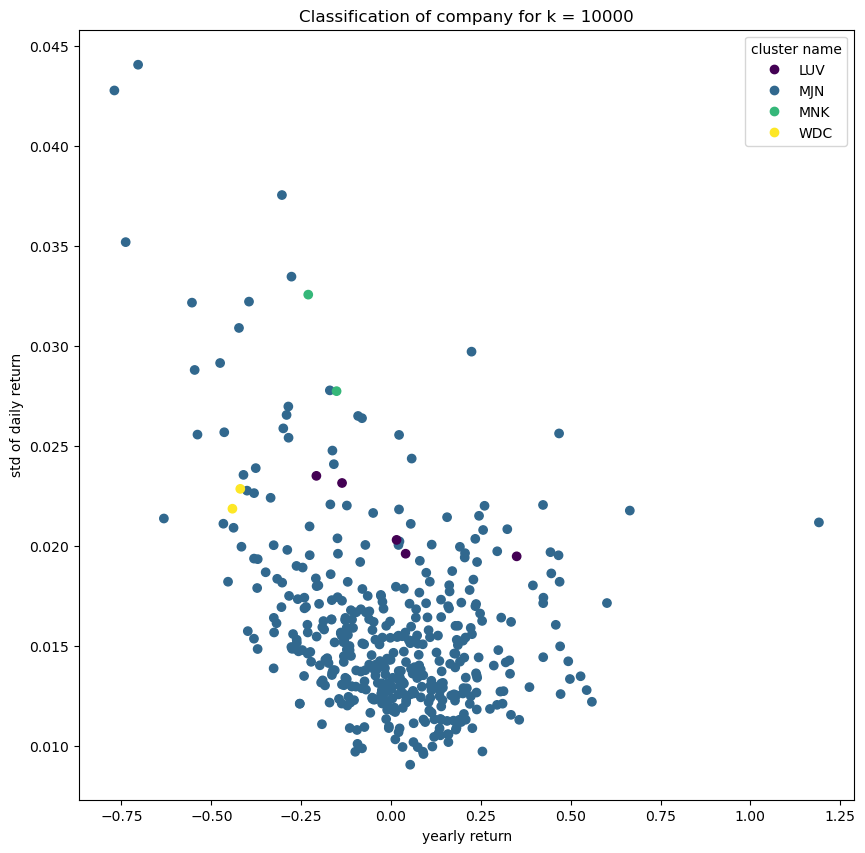

number of clusters:  4


In [35]:
set_starters_10000, next_nodes_10000 = cluster_correlations(edges, firms, k = 10000)
all_clusters_10000 = construct_sets(set_starters_10000, next_nodes_10000)
filtered_clusters_10000 = filtered(all_clusters_10000)
company_name_10000 = get_company(filtered_clusters_10000)
filtered_cluster_list_10000 = get_cluster(company_name_10000, filtered_clusters_10000)
filtered_yearly_returns_10000 = filtered_df(yearly_returns, all_clusters_10000, company_name_10000)
filtered_dr_std_10000 = filtered_df(dr_std, all_clusters_10000, company_name_10000)
filtered_graph_df_10000 = pd.DataFrame(data = list(zip(filtered_cluster_list_10000, filtered_yearly_returns_10000, filtered_dr_std_10000)), columns = ['cluster', 'yearly return', 'std of daily return'])
company_name_dict_10000 = get_company_dict(company_name_10000)
#print(company_name_dict)
filtered_graph_df_10000 = filtered_graph_df_10000.rename(index = company_name_dict_10000)
label_10000, filtered_graph_df_10000['given colour'] = np.unique(filtered_graph_df_10000["cluster"], return_inverse=True)
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = filtered_graph_df_10000)
plt.legend(sc.legend_elements()[0], label_10000, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company for k = 10000")
plt.show()
print('number of clusters: ', len(list(filtered_clusters_10000.keys())))

For k = 50000: 

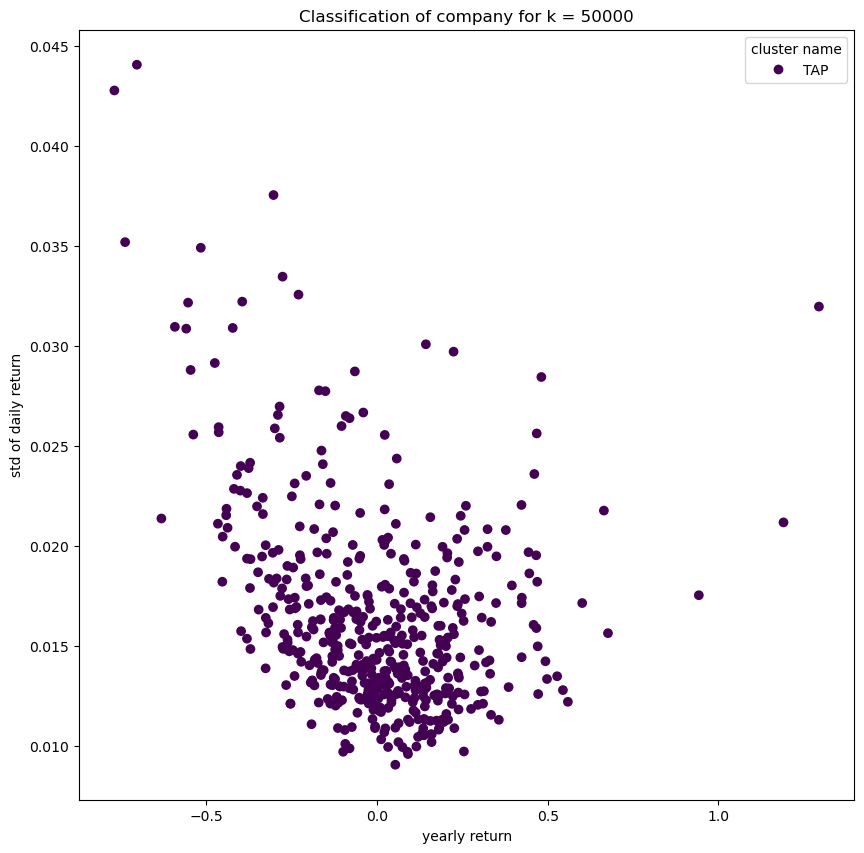

number of clusters:  1


In [36]:
set_starters_50000, next_nodes_50000 = cluster_correlations(edges, firms, k = 50000)
all_clusters_50000 = construct_sets(set_starters_50000, next_nodes_50000)
filtered_clusters_50000 = filtered(all_clusters_50000)
company_name_50000 = get_company(filtered_clusters_50000)
filtered_cluster_list_50000 = get_cluster(company_name_50000, filtered_clusters_50000)
filtered_yearly_returns_50000 = filtered_df(yearly_returns, all_clusters_50000, company_name_50000)
filtered_dr_std_50000 = filtered_df(dr_std, all_clusters_50000, company_name_50000)
filtered_graph_df_50000 = pd.DataFrame(data = list(zip(filtered_cluster_list_50000, filtered_yearly_returns_50000, filtered_dr_std_50000)), columns = ['cluster', 'yearly return', 'std of daily return'])
company_name_dict_50000 = get_company_dict(company_name_50000)
#print(company_name_dict)
filtered_graph_df_50000 = filtered_graph_df_50000.rename(index = company_name_dict_50000)
label_50000, filtered_graph_df_50000['given colour'] = np.unique(filtered_graph_df_50000["cluster"], return_inverse=True)
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = filtered_graph_df_50000)
plt.legend(sc.legend_elements()[0], label_50000, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company for k = 50000")
plt.show()
print('number of clusters: ', len(list(filtered_clusters_50000.keys())))

For k=5000,10000,50000:  \
 almost all the firms are selected into one specific cluster, which is not consisten with the real world clustering. This means that although our clusters can reflect the real world clustering in some extent(with a proper selection of k), there are still some unsolvable problems of the algorithm.

#### 4. Now, we want to step into a specific cluster generated by our algorithem to see that whether our result make sens. we select a specific cluster for the results of k=200:

- {'SPG', 'BXP', 'VNO', 'KIM', 'GGP', 'AVB', 'EQR', 'ESS', 'FRT', 'UDR', 'SLG', 'AIV'}
   We denote this cluster as cluster 1. This cluster consists of Simon Property Group, Boston Properties, Vornado Realty Trust, Kimco Realty    Corporation, Greatland Gold plc, AvalonBay Communities, Equity Residential, Essex Property Trust, Federal Realty Investment Trust, UDR,    SL Green Realty Corp,SL GreenRealty Corp.We can clearly see that all the firm in this cluster belong to Real estate sector and Basic      material sector. In our common sense, companies in these two sectors tend to have relative stable price fluctuation and low beta compared    to companies in other sectors. Therefore, it makes sense that these companies are placed in the same sectors. In order to verify that, we    can plot the returns and prices of companies in this cluster.

In [37]:
from sklearn.preprocessing import MinMaxScaler
#we first normalize the prices of companies in cluster1
scaler = MinMaxScaler()
cluster1=list({'SPG', 'BXP', 'VNO', 'KIM', 'GGP', 'AVB', 'EQR', 'ESS', 'FRT', 'UDR', 'SLG', 'AIV'})
cluster1P=price_data[cluster1]
cluster1Ptrans = scaler.fit_transform(cluster1P)
cluster1P=pd.DataFrame(index=cluster1P.index,columns=cluster1P.columns,data=cluster1Ptrans)

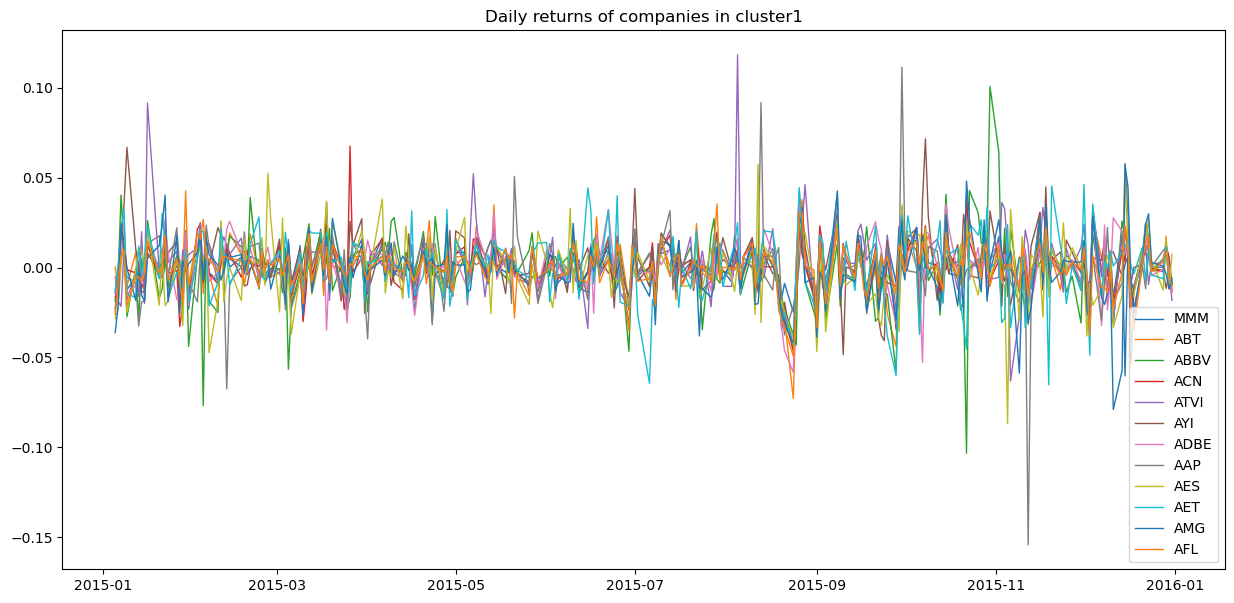

In [38]:
#plot the daily return of cluster1
plt.subplots(figsize=(15,7))
x=pd.to_datetime(list(daily_return.index))
names=locals()
for i in range(len(cluster1)):
    names[f'y{i+1}']=daily_return[daily_return.columns[i]].values
    plt.plot(x,names[f'y{i+1}'],label=daily_return.columns[i],linewidth=1)
    plt.legend()
    plt.title('Daily returns of companies in cluster1')
plt.show()

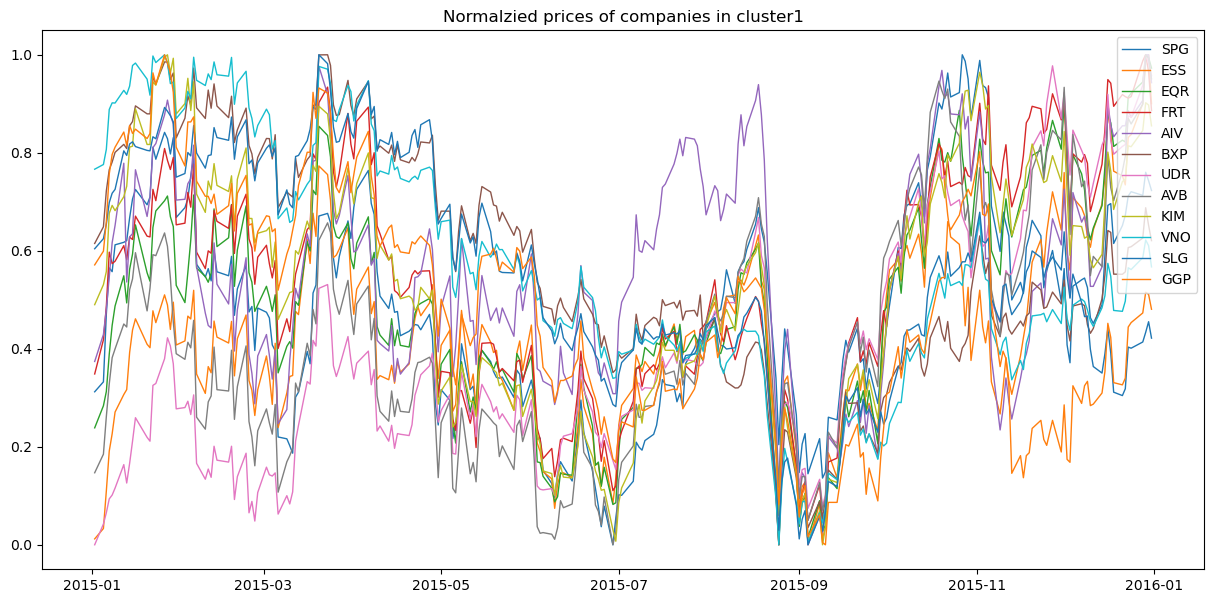

In [39]:
#plot normalized prices of companies in cluster1
plt.subplots(figsize=(15,7))
x=pd.to_datetime(list(cluster1P.index))
names=locals()
for i in range(len(cluster1)):
    names[f'y{i+1}']=cluster1P[cluster1P.columns[i]].values
    plt.plot(x,names[f'y{i+1}'],label=cluster1P.columns[i],linewidth=1)
    plt.legend(loc='upper right')
    plt.title('Normalzied prices of companies in cluster1')
plt.show()

According to the charts above, the normalized prices of firms in cluster1 always show the same trend between the time period of 2015.1-2016.1. By this visualized result, we can conclude that the cluster1 implied by our algorithm make sense.

## Part 3: 

**40% of grade**

Depending on your interests, you may work on either subsection below, or both. You might go deeper into one question than another, but for an outstanding grade, you should have at least some discussion on both.

### In-depth analysis

The project is _open_ in the sense that you can probably think of further interesting questions to look into based on returns, correlations, and clusters. This is not required but being creative and going further than the above questions will make your work stand out. You can explore one or several of the ideas below, or come up with questions of your own.

Depending on your interests, you might look at different things. For example, when researching the algorithm, you might be interested in its complexity, and how to improve your implementation's efficiency. On Wikipedia, you may find a couple of ways to drastically improve the algorithm speed, but are relatively small changes to your code.

If you're more interested in the financial applications of clustering, there are also opportunities to think about further steps. For example, some people claim that you can derive trading strategies based on clustering - that often one of the stocks in a cluster is a leader and the others follow that price. If this is true, you could track the price of the leader stock and then trade the other stocks in the cluster based on changes in the leader's price. Do you think this would make sense? Do you have an idea on how to identify a leader stock?

You might also want to repeat the analysis for different time periods. You would be able to do this by looking at the code for the second homework to figure out how to read data from Yahoo Finance using pandas, and going through the process for all companies in the csv file for another time period. Perhaps you could explore for example how correlations between companies have changed over time, or how clusters found by your algorithm change over time.

### Exploring other clustering methods

You've used just one approach to clustering, and arguably not the best one. Research clustering algorithms and libraries to apply them in Python. Discuss some other algorithms that could be used, and how they differ from the one you've implemented. Look at the Python library `scikit-learn`. How would you apply the clustering algorithms provided by the library to stock price data? Would you need to develop new metrics other than correlations? If you want to go even further,  try running some of these other clustering algorithms on your data, and report the results. Start from here: http://scikit-learn.org/stable/modules/clustering.html#clustering; you'll find a stock market example there too. For future reference, you may also find other interesting machine-learning tools for both stock market analysis or other analytics purposes.

### Question 4

Create cells below to add your extra part as code and narrative text explaining your idea and results.

### 1. In-depth analysis
Collete Data for anoter time period:

In [40]:
#Load the data from yahoo finance 
!pip install yfinance
import yfinance as yf
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_1y = table[0]
data_1y = yf.download(list(df_1y['Symbol']), period='1y')
recent_1y_data=data_1y['Close']

[*********************100%***********************]  502 of 502 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [41]:
def get_top5_corr(corr, company_name, k = 5):
    #company = names_dict_1y[company_name][0] # Set companys name

    print('The n top correlated companies for given company: ', company_name)
    # n = k + 1 because the largest one is company itself
    # Then we also need to be delete the largest one
    print(corr[company_name].nlargest(n = k + 1)[1:]) # Get 5 highest Correlations
    print()

In [42]:
daily_return_1y = recent_1y_data.pct_change() # Get daily return
daily_return_1y = daily_return_1y[1:] # Remove the first row
corr_1y = daily_return_1y.corr()
get_top5_corr(corr_1y, "GOOG")
get_top5_corr(corr_1y, "AMZN")
get_top5_corr(corr_1y, "META")
get_top5_corr(corr_1y, "MSFT")
get_top5_corr(corr_1y, "AAPL")

The n top correlated companies for given company:  GOOG
GOOGL    0.997042
MSFT     0.816723
NVDA     0.748230
AAPL     0.743658
ANSS     0.740008
Name: GOOG, dtype: float64

The n top correlated companies for given company:  AMZN
MSFT     0.724506
GOOG     0.718368
GOOGL    0.714418
ANSS     0.706494
INTU     0.700715
Name: AMZN, dtype: float64

The n top correlated companies for given company:  META
GOOG     0.695728
GOOGL    0.684915
QRVO     0.680799
ANSS     0.670088
CRM      0.648280
Name: META, dtype: float64

The n top correlated companies for given company:  MSFT
GOOGL    0.821211
GOOG     0.816723
ANSS     0.803588
INTU     0.790036
AAPL     0.787407
Name: MSFT, dtype: float64

The n top correlated companies for given company:  AAPL
MSFT     0.787407
TRMB     0.754427
GOOGL    0.748208
GOOG     0.743658
APH      0.733182
Name: AAPL, dtype: float64



- Now, we look at the correlation between technology companies in the last one year. Compared to 2015, these technology companies have a higher correlation nowadays. The highest correlation is between Google and Microsoft, which is 0.821211. META(Facebook) has a relatively low correlation among these five technology companies. The company most correlated with Apple is no longer a manufacturing firm; instead it is Microsoft. A precision equipment company, TRMB, becomes highly correlated to Apple, which might be because it provides services to iPhone and IOS systems. 
- Notice that Google appear on all technology companies' top five correlation list. It is because Google has become the largest browser engine and is deeply related to the business of each technology company. Financial service institutions like VISA and Mastercard are becoming less correlated with technology companies, and they no longer appear on the top 5 list.

### 2. Exploring other clustering methods

#### 1. Other Algorithm:  
   1. prim's algorithm    \
      Prim's algorithm algorithm corresponds to Kruskal's algorithm, and they are both algorithms for finding the minimum spanning tree with weights.   \
      The core of the prim's algorithm is: specify a starting vertex, mark that vertex as visited, and find the vertices that may be directly connected to that vertex (unvisited). Then the shortest path is found based on the path length of the connected vertices. After repeating the number of vertices for a number of times, stop the loop. Then the MST tree is obtained.     \
      The operation of the prim's algorithm is somewhat similar to the greedy algorithm. The local optimum gets the global optimum.      \
      **Difference between prim's algorithm and Kruskal's algorithm:**
      - The time complexity of Prim's algorithm is O($n^2$), and the algorithm is suitable for finding the minimum support tree of edge-dense nets
      - The time complexity of Kruskal's algorithm is O(eloge), which is suitable for finding the minimum support tree of a sparse network
      - Kruskal's algorithm is edge-centered in its execution, while Prim's algorithm is vertex-centered. During the execution of the algorithm, the set of vertices is divided into the set of vertices already visited and the set of vertices not visited, which is achieved by continuously finding the shortest edge between the two sets. 

#### 2. Do hierarchical cluster
Find the dissimilarity of the measured objects by the correlation coefficient matrix, using the following function:
$$
\text{dissimilarity} = 1 - \text{abs}(\text{correlation})
$$

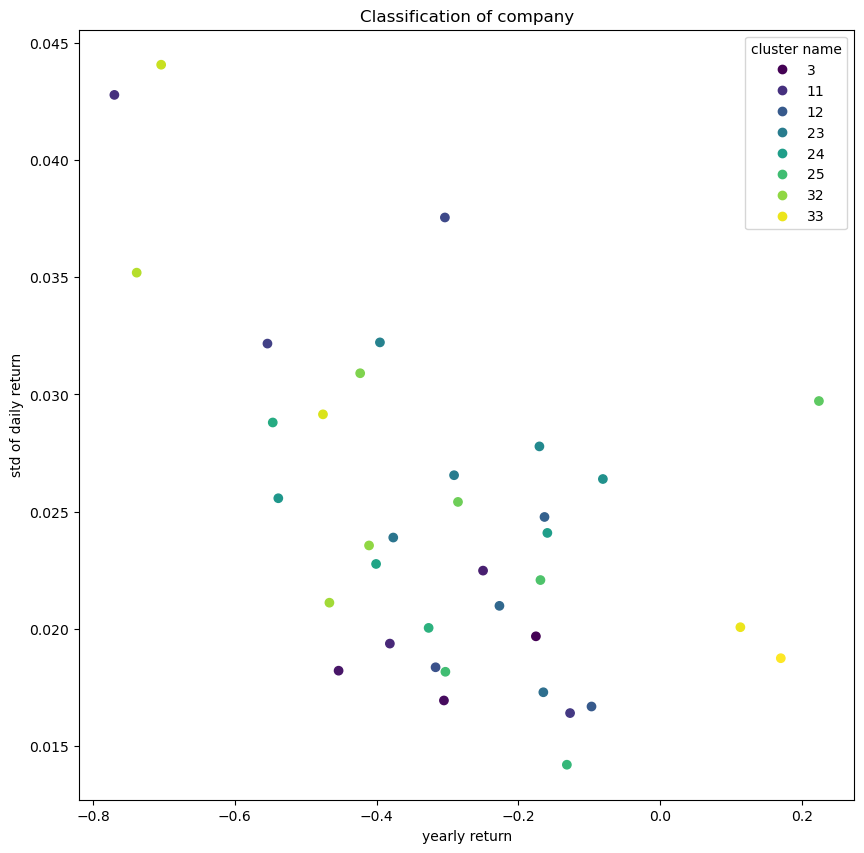

number of clusters:  37


In [43]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

dissimilarity = 1 - np.abs(correl)
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.5, criterion='distance')
labels_dict = dict(zip(firms ,labels))
label_unique = list(set(labels))


def return_all_key(val, dicti):
    set1 = set() 
    for key, value in dicti.items():
        if val == value:
            set1.add(key)
    return set1


def get_cluster(company, cluster):
    cluster_list = []
    for i in company:
        key = return_key(i, cluster)
        cluster_list.append(key)
    return cluster_list


label_dict_reverse = {}
for i in label_unique:
    label_for_company = return_all_key(i, labels_dict)
    label_dict_reverse[i] = label_for_company

hierarchy_filtered_label = filtered(label_dict_reverse)
hierarchy_company_name = get_company(hierarchy_filtered_label)
hierarchy_filtered_cluster_list = get_cluster(hierarchy_company_name, hierarchy_filtered_label)
hierarchy_filtered_yearly_returns = filtered_df(yearly_returns, label_dict_reverse, hierarchy_company_name)
hierarchy_filtered_dr_std = filtered_df(dr_std, label_dict_reverse, hierarchy_company_name)
hierarchy_filtered_graph_df = pd.DataFrame(data = list(zip(hierarchy_filtered_label, hierarchy_filtered_yearly_returns, hierarchy_filtered_dr_std)), columns = ['cluster', 'yearly return', 'std of daily return'])
hierarchy_company_name_dict = get_company_dict(hierarchy_company_name)
hierarchy_filtered_graph_df = hierarchy_filtered_graph_df.rename(index = hierarchy_company_name_dict)
hierarchy_label, hierarchy_filtered_graph_df['given colour'] = np.unique(hierarchy_filtered_graph_df["cluster"], return_inverse=True)
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = hierarchy_filtered_graph_df)
plt.legend(sc.legend_elements()[0], hierarchy_label, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company")
plt.show()
print('number of clusters: ', len(list(hierarchy_filtered_label.keys())))

#### 3. Use Python library `scikit-learn`

1. Method of determining the number of clusters

Firstly, try for only daily returns.

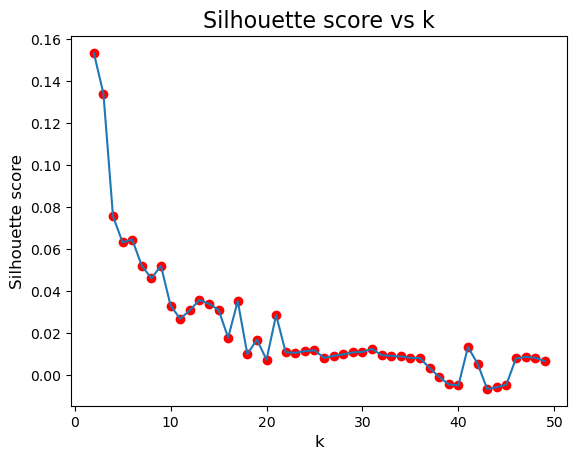

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
X = daily_return.values
silhouette_l = []
for i in range(2, 50):
    kmeans_model = KMeans(n_clusters = i, random_state = 1).fit(X)
    labels = kmeans_model.labels_
    silhouette_l.append(silhouette_score(X, labels, metric = 'euclidean'))
range_full = np.arange(2, 50)
plt.plot(range_full, np.squeeze(silhouette_l))
plt.scatter(range_full, np.squeeze(silhouette_l),color="r")
plt.xlabel("k",fontsize=12)
plt.ylabel("Silhouette score",fontsize=12)
plt.title("Silhouette score vs k",fontsize=16)
plt.show()

By the above graph we can find that the largest silhouette score here is also smaller than 0.5, so the daily return for differnet company is not suitable to do the clustering.

Secondly, try for only yearly returns.

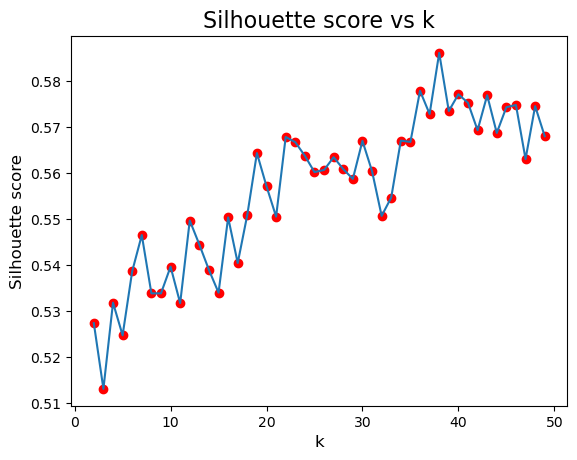

The largest silhouette score appears when k =  38


In [45]:
Y = yearly_returns.values
Yc = [[i] for i in Y]
#print(Yc)
#Yc1 = yearly_returns.values.reshape(1, -1)
#Yc1 = [[i] for i in Yc1]
#Yc1 = Yc.reshape(1, -1)
silhouette_l = []
for i in range(2, 50):
    kmeans_model = KMeans(n_clusters = i, random_state = 1).fit(Yc)
    labels = kmeans_model.labels_
    silhouette_l.append(silhouette_score(Yc, labels, metric = 'euclidean'))
range_full = np.arange(2, 50)
plt.plot(range_full, np.squeeze(silhouette_l))
plt.scatter(range_full, np.squeeze(silhouette_l),color="r")
plt.xlabel("k",fontsize=12)
plt.ylabel("Silhouette score",fontsize=12)
plt.title("Silhouette score vs k",fontsize=16)
plt.show()
print('The largest silhouette score appears when k = ',  silhouette_l.index(max(silhouette_l)) + 2)

By this we can find that if we classify by yearly return the best number of clusters is 38, and when k = 38, the silhouette score is larger than 0.5, which is a good classifictaion. 
Then do for k = 38:

In [46]:
graph_df_yr = pd.DataFrame(data = list(zip(yearly_returns, dr_std)), columns = ['yearly return', 'std of daily return'])
company_name_dict = get_company_dict(firms)
graph_df_yr = graph_df_yr.rename(index = company_name_dict)

In [47]:
k_means_model_yr = KMeans(n_clusters = 38).fit(graph_df_yr)
label_pred_yr = k_means_model_yr.labels_
centroids_yr = k_means_model_yr.cluster_centers_
inertia_yr = k_means_model_yr.inertia_
print(label_pred_yr)
print(centroids_yr)
print(inertia_yr)

[29  1 17 22  8 15  2 29 34 12 19 26 25 17 23 20 29 16  1 22 22 10 10 17
 30 28 12 24 10 11 26 19 21 26  6 23 33  1  1 10 32  1  6 26  3 14 10 19
 34 17 22 14  1 25 26 22 30  6 12 23 14 29  6 10 26 21 16  5 11 17 10  1
  6 11 26 18 33  6  5 10 32 12  5  6 11 12 19 26  5 25 35 11 27 17 34 21
 37 23  3  1 14 28 23 22 33 26 29 14 22 14 25 17  6 10 26 17 22 17  3 26
 30 11 22  6 34 16 25  2 14 21 17  5 22  1 33  0 32 22 23 19 19  1 14 17
  5 33 20 29 10  5  5 12 17 11 33 21 17 12 30  5 11 23 11 19 27 18 28  6
 33 33 10 19 30  1  1 31  5 34 20  5 21  5 10  1 30 23  2  5  3 11  3 16
 33 29 35 27  9 19 32 34 26  2 10 21  1 23 14 31 29 33 11  5 14  3 17 12
 25 35 17 17 23  6 27 30  2 25 31 27 27 35 14 26  1  5 10 22  5 34 33 22
 14  1  5 34  5 29 26 34 14 35 16  6 10  6 14 36  1 23 20 33 29 21  1 34
  1 21 19 21 12  5 29 25 33 17  6 21 26  1  0 19 13  6  5 26 35  2  6 29
 33  2 29 11 14 29 17  0 14 36 12 12  2 12 23 18 25 23 25 13 29 12  0  0
 27  4 33 12 29  5 29 25 20 22  3  3 11 14  2 13 23

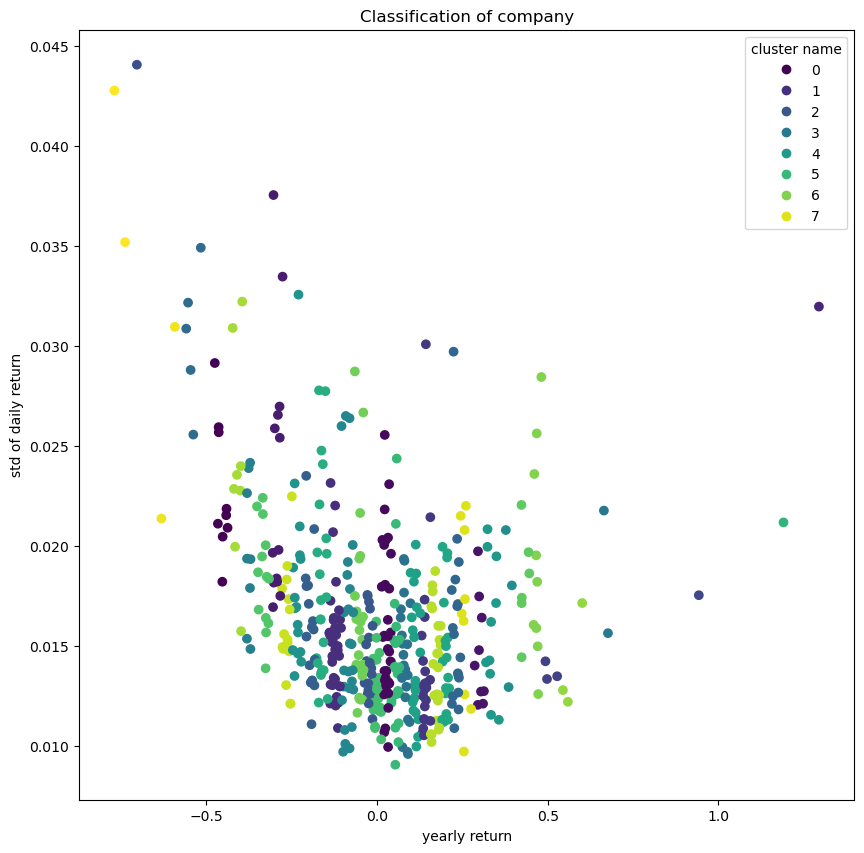

number of clusters:  38


In [48]:
graph_df_yr['label'] = label_pred_yr
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
label_yr, graph_df_yr['given colour'] = np.unique(graph_df_yr["label"], return_inverse=True)
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = graph_df_yr)
plt.legend(sc.legend_elements()[0], label_yr, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company")
plt.show()
print('number of clusters: ', len(list(set(label_pred_yr))))

In the above graph we can find that for companies with yearly return between - 0.5 and 0.5, the points of different clusters are still relatively clear boundaries, so it can be considered a relatively suitable cluster. 
But this is almost completely different from the diagram drawn according to the classification of company types.

Thirdly, try for only volatility of daily return

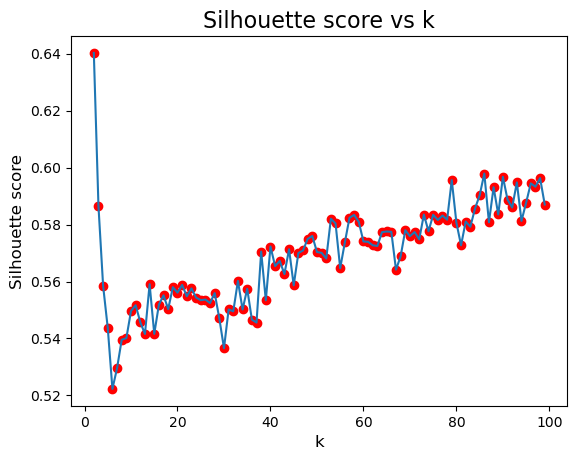

The largest silhouette score appears when k =  2


In [49]:
Z = dr_std
Zc = [[i] for i in Z]
silhouette_l = []
for i in range(2, 100):
    kmeans_model = KMeans(n_clusters = i, random_state = 1).fit(Zc)
    labels = kmeans_model.labels_
    silhouette_l.append(silhouette_score(Zc, labels, metric = 'euclidean'))
range_full = np.arange(2, 100)
plt.plot(range_full, np.squeeze(silhouette_l))
plt.scatter(range_full, np.squeeze(silhouette_l),color="r")
plt.xlabel("k",fontsize=12)
plt.ylabel("Silhouette score",fontsize=12)
plt.title("Silhouette score vs k",fontsize=16)
plt.show()
print('The largest silhouette score appears when k = ',  silhouette_l.index(max(silhouette_l)) + 2)

Accroding to the above graph, we can find that although the silhouette score for all k in range 1 to 50 are larger than 0.5, the largest one occurs on k = 2. 

In [50]:
graph_df_dstd = pd.DataFrame(data = list(zip(yearly_returns, dr_std)), columns = ['yearly return', 'std of daily return'])
company_name_dict = get_company_dict(firms)
graph_df_dstd = graph_df_dstd.rename(index = company_name_dict)

In [51]:
k_means_model_dstd = KMeans(n_clusters = 2).fit(graph_df_dstd)
label_pred_dstd = k_means_model_dstd.labels_
centroids_dstd = k_means_model_dstd.cluster_centers_
inertia_dstd = k_means_model_dstd.inertia_

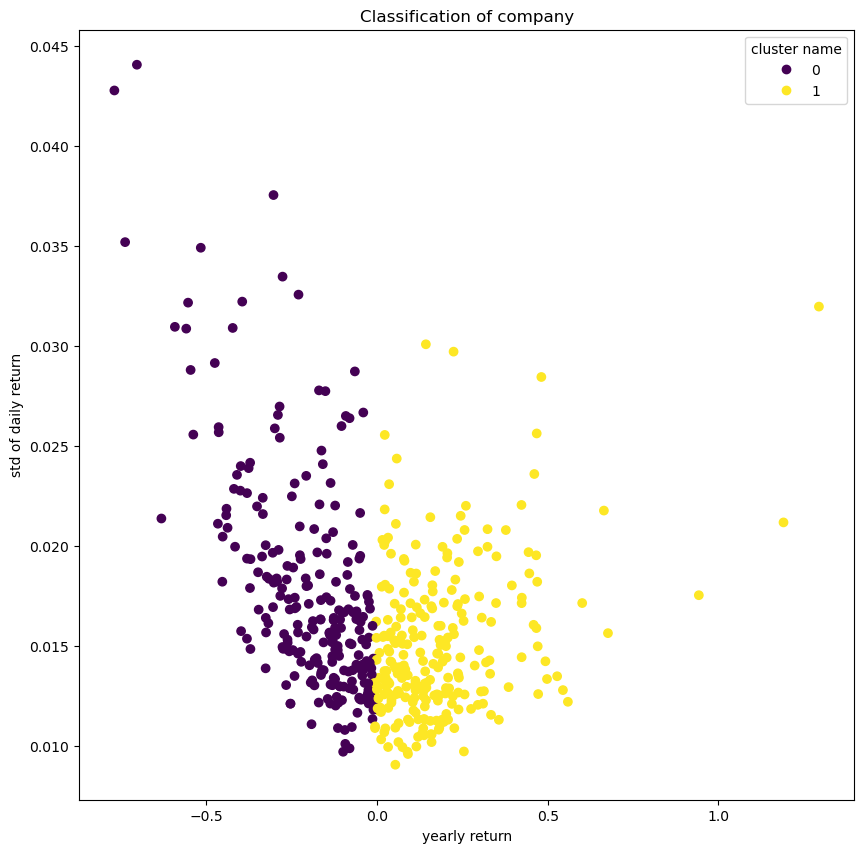

number of clusters:  2


In [52]:
graph_df_dstd['label'] = label_pred_dstd
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
label_dstd, graph_df_dstd['given colour'] = np.unique(graph_df_dstd["label"], return_inverse=True)
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = graph_df_dstd)
plt.legend(sc.legend_elements()[0], label_dstd, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company")
plt.show()
print('number of clusters: ', len(list(set(label_pred_dstd))))

In the above graph we can find that the boundaries of the two clusters are very clear and are a good classification.

Forthly, try for the correlation matrix:

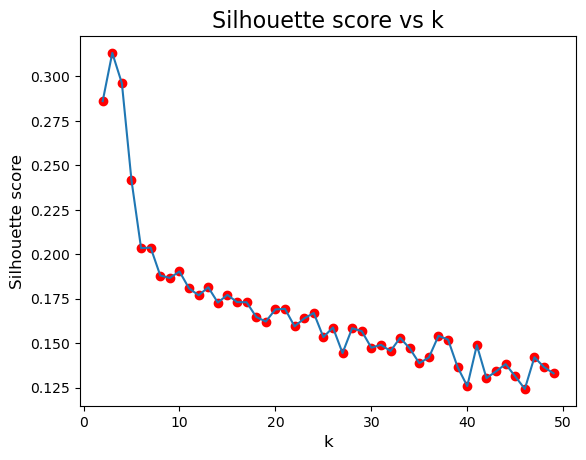

The largest silhouette score appears when k =  3


In [53]:
silhouette_l = []
for i in range(2, 50):
    kmeans_model = KMeans(n_clusters = i, random_state = 1).fit(correl)
    labels = kmeans_model.labels_
    silhouette_l.append(silhouette_score(correl, labels, metric = 'euclidean'))
range_full = np.arange(2, 50)
plt.plot(range_full, np.squeeze(silhouette_l))
plt.scatter(range_full, np.squeeze(silhouette_l),color="r")
plt.xlabel("k",fontsize=12)
plt.ylabel("Silhouette score",fontsize=12)
plt.title("Silhouette score vs k",fontsize=16)
plt.show()
print('The largest silhouette score appears when k = ',  silhouette_l.index(max(silhouette_l)) + 2)

When the cluster number is 3, the largest silhouette score occurs, so the best cluster number is 2, but actully, the largest silhouette score here is also smaller than 0.5, so this is also not a good  classification.

Then try for both yearly return and std of daily return:

      yearly return  std of daily return
MMM       -0.057624             0.011659
ABT        0.021440             0.013748
ABBV      -0.071393             0.020054
ACN        0.201626             0.012896
ATVI       0.942684             0.017541
...             ...                  ...
YHOO      -0.337054             0.019475
YUM        0.032109             0.020421
ZBH       -0.081229             0.012888
ZION      -0.027638             0.017499
ZTS        0.114511             0.018626

[496 rows x 2 columns]


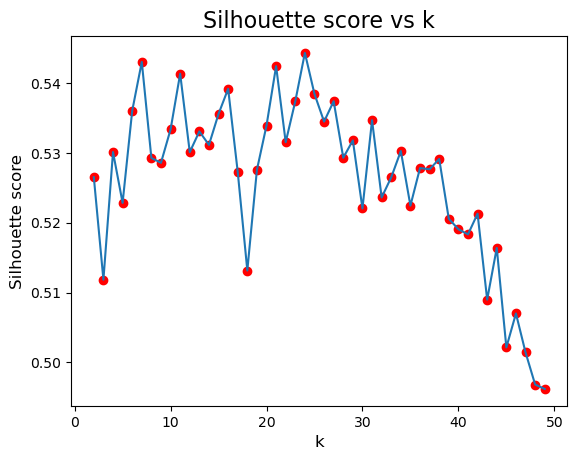

The largest silhouette score appears when k =  24


In [55]:
graph_df = pd.DataFrame(data = list(zip(yearly_returns, dr_std)), columns = ['yearly return', 'std of daily return'])
company_name_dict = get_company_dict(firms)
graph_df = graph_df.rename(index = company_name_dict)
print(graph_df)
silhouette_l = []
for i in range(2, 50):
    kmeans_model = KMeans(n_clusters = i, random_state = 1).fit(graph_df)
    labels = kmeans_model.labels_
    silhouette = (silhouette_score(graph_df, labels, metric = 'euclidean'))
    silhouette_l.append(silhouette)
range_full = np.arange(2, 50)
plt.plot(range_full, np.squeeze(silhouette_l))
plt.scatter(range_full, np.squeeze(silhouette_l),color="r")
plt.xlabel("k",fontsize=12)
plt.ylabel("Silhouette score",fontsize=12)
plt.title("Silhouette score vs k",fontsize=16)
plt.show()
print('The largest silhouette score appears when k = ',  silhouette_l.index(max(silhouette_l)) + 2)

By this we can find that if we classify by yearly return and volatility of daily return the best number of clusters is 24, and when k = 24, the silhouette score is larger than 0.5, which is a good classifictaion. \
Then do for k = 24:

In [56]:
k_means_model = KMeans(n_clusters = 24).fit(graph_df)
label_pred = k_means_model.labels_
centroids = k_means_model.cluster_centers_
inertia = k_means_model.inertia_
print(label_pred)
print(centroids)
print(inertia)

[22 23  1 21 18 20 12 22  2  3 17 11 23  1  9  7 22 13 23 21 21 11 11  1
 14 14  3  6 11  9 11 17 19 11 10  9 10 23 23 11 13 23 10 11  2 19 11 17
  2  1 21  4 23 23 11 21 14 10  3  9  4 22 10 11 11 19 13 15  9  1 11 23
 10  9 11  7 21 10 15 22  5  3 15 10  9  3 17 11 15  4  3  9  2  1 17 19
  8  9  2 23 19 14  9 21 21 11 22  4 21  4  4  1 10 11 11  1 21  1  2 23
 14  9 21 10 17 13 23 12 19 10  1 15 21 23 21  5  5 21  9 17 17 23 19  1
 15 21 12 22 11 15 15  3  1  9 10 19  1  3 14 15  9 15  9 17  2  7 14 10
 10 21 11 17 14 23 23  0 15 17 12 15 19 15 11 23 14  9 12 15  2  9  2 13
 21 22  3  2  8 17 13 17 23 12 11 19 23  9  4  0 22 10  9 15  4  2  1  3
  4  3  1  1  9 10 13 14 12  4  0  2 13  3  4 11 23 15 11 21 15 17 21 21
  4 23 15 17 15 22 23 17  4  3 13 10 11 10  4 16 23  9 12 10 22 19 23 17
 23 19 17 19  3 15 22  4 10  1 10 19 11 23  5 17 16 10 15 11  3 12 10 22
 21 12 22  9 19 22  1  5  4 16  3  3 12  3  9  7  4  9  4 16 22  3  5  5
 13  6 21  3 22 15 22  4 12 21  2  2  9 19 12 16 15

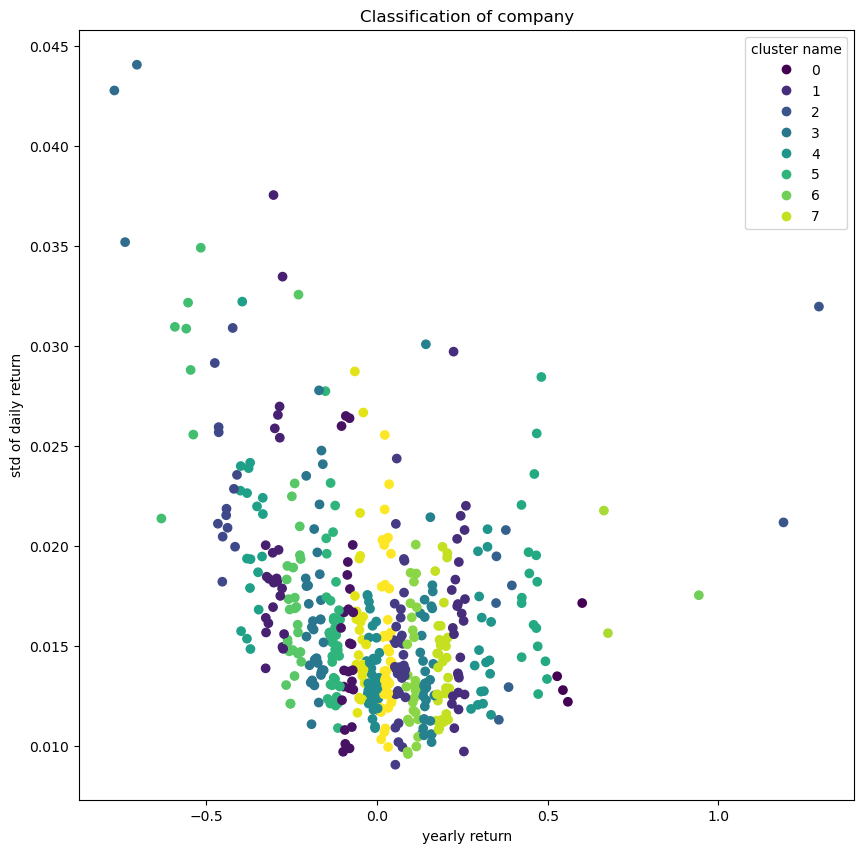

number of clusters:  24


In [57]:
graph_df['label'] = label_pred
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10,10))
label, graph_df['given colour'] = np.unique(graph_df["label"], return_inverse = True)
sc = ax.scatter(x = 'yearly return', y = 'std of daily return', c = 'given colour', data = graph_df)
plt.legend(sc.legend_elements()[0], label, title = "cluster name")
plt.xlabel("yearly return")
plt.ylabel("std of daily return")
plt.title("Classification of company")
plt.show()
print('number of clusters: ', len(list(set(label_pred))))

In the above graph we can find that for companies with yearly return between -0.5 and 0.5, the points of different clusters are still relatively clear boundaries, so it can be considered a relatively suitable cluster.   \
It looks better than do classification only by yearly returns, and it is more detailed than the classification by volatility of daily price.  \
But this is almost completely different from the diagram drawn according to the classification of company types.

## All done!

Create a zip file containing your submission and upload it on the Hub.